<h1><center>Integration of paddock scale modelling and Source</center></h1>

<h2><center>Data visualisation and calibration tools</center></h2>



<h1><center>Part 1: Introduction and Approach</center></h1>
## Introduction

Linking outputs from daily paddock scale models (APSIM) to large scale daily Source catchment models (Sacramento + daily SedNet) are currently being undertaken by distributing monthly loads generated from the paddock model across the Sacramento hydrology of the Source model. 

The application of paddock constituent time series to catchment scale hydrology result in inconsistencies in runoff and constituent timing and quantity. Runoff from paddock scale models may occur on different days (or at a different frequency) than estimated from the calibrated catchment models. The hydrology of the catchment models however has been systematically parameterised. 

The result of the current approach is a potential mismatch between paddock scale generated constituent concentrations and concentrations translated to Source. Also, this approach does not allow for the translation of paddock scale water balance changes (i.e. irrigation or water recycling) from the paddock scale to the catchment scale. 

## The proposed model integration approach

The proposed model integration approach seeks to directly incorporate both the runoff (surface and drainage) and the water quality constituents from the paddock scale models into the existing source models, effectively replacing both the FU based hydrology and maintaining a direct link to paddock scale constituent generation. 

The model integration has been undertaken via a plugin in Source. The plugin essentially adds a few more calculation steps to the paddock scale runoff and constituent loads to bring the paddock scale output to FU scale output which is the smallest base unit of the Source catchment models. 

The conceptual models for APSIM and Source are shown below 

<img src="Pictures/Sacramento_and_APSIM.png" width="1000">

In APSIM, the ‘runoff’ and ‘drainage’ terms are the outputs that could be passed directly to Source or to a plugin. Runoff is calculated via the curve number technique and crops can access water in the different soil horizons depending on root zone depth. The 'drainage' term is what is left over after any rainfall and irrigation runoff, crop water use and soil moisture have been calculated. 

In Sacramento, the exceedence of soil moisture capcity (or extent of impervious areas) determine if runoff will occur.  Evapotransipration from the upper and lower zone soil moisture stores deplete these stores and water can flow from the upper to the lower stores. Conceptually, these elements of the Sacramto model are similar to the mass balance that is undertaken in APSIM as shown below.  

<img src="Pictures/Sacramento_and_APSIM_1.png" width="1000">

The additional Sacramento model components that are not present in the APSIM conceptual model are generally associated with translation of water balance to the catchment outlet and removal of water to achieve mass balance at gauge sites:
-  Direct runoff and interflow pass through a unit hydrograph model to delay and lag the flows. This output creates the Source model 'quick flow' term
-  Baseflow loss and channel loss allows the Sacramento model to remove some water to groundwater to achieve mass balance at gauge sites 
-  The outflow from the lower zone soil moisture stores is determined by a coefficient to delay, or lag the outflow from this component of the model, creating the 'slowflow' term used in Source

These three additiional elements in the Sacramento model have been sufficient in Source to model FU based runoff to the stream network. Of course, streamflow routing and storage operations are also modelled in Source to further attenuate and translate flows to gauge sites and the catchment outlet, but these processes are also available to APSIM runoff imported at the FU level. 

The proposed model integration approach has three elements to translate APSIM generated runoff and constituents to subcatchment outlets (from pddock to FU level):
-  A surface routing store (like the unit hydrograph delay in Sacramento)
-  A drainage loss to remove some drainage water to deep drainage not measured at gauge sites and maintain catchment mass balance; and
-  A drainage routing store to attenuate the drainage outflow time series

<img src="Pictures/APSIM_plugin_components1.png" width="800">


## The proposed APSIM to Source plugin

The proposed APSIM to Source plugin (Observed Paddock Hydrology Model with Storage) takes standard APSIM runoff (mm) and drainage (mm), in addition to standard constituent time series (kg/ha/d for DIN) and (g/ha/d for pesticides), applies losses if appropriate and passes the time series through the relavent storages to create the FU based  quickflow, slowflow and constituent time series. 

The basic equations of the plugin are as follows:

$$DS=D*(1-DR)$$
and
$$DD = D-DS$$

Where:
- D = Original APSIM drainage time series (mm/d)
- DD = Deep Drainage (mm/d) that is not seen at the gauge
- DS = Drainage delivered to Drainage Store
- DR = Deep Drainage Delivery Ratio (%) the ratio of drainage delivered to the drainage store to total drainage calculated by APSIM. Value between 0 and 1. 

The drainage store and surface stores are calculated using a linear storage:

$$BR_t=(DS_t+DStore)*DSE$$
The new drainage store for the next time step becomes: $$DStore=DS_t+DStore_t-BR_t$$



The surface store is idential to the drainage store: 
$$SR_t=(SS_t+SStore)*SSE$$
The new surface store for the next time step becomes:$$SStore=SS_t+SStore_t-SR_t$$

Where:
- BR = Baseflow store runoff (mm/d)
- SR = Surface store runoff (mm/d)
- DS = Drainage delivered to drainage store (mm/d)
- SS = Surface runoff delivered to the surface store (mm/d) = the time series provided by APSIM
- DSE = Drainage store emptying ratio - the percentage of drainage store delivered the stream in a time step. Typucally  between 0.03 and 0.1 and similar to the LZFK and LZPK values in the Sacramaneto model.
- SSE = Surface store emptying ratio - the percentage of the surface store d/e/livered to the stresam in a time step - typiclaly close to 1 and similar in value to the UH1 parameter in the Sacramento model.

Water quality constituents (mass) delivered from APSIM to Source are currently treated as in the same way as the flow time series. 

1) Constituents associated with the surface runoff (i.e. pesticides in sediment phase and water phase) are passed to the surface store via a delivery ratio (%) and emptied from the surface store via  the linear storeage

2) Constituents associated with the drainage runoff (i.e. a component of the DIN) are partially removed via the deep drainage delivery ratio to conserve the water and mass balance to this point before being subject to a second delivery ratio (%) before being passed to and emptied from the drainage store via linear storage. 

With all water quality constituents, the modeller has an option to apply monthly constituent delivery ratios to try and match the typical monthly concentration profiles observed at particular sites.  



### Plugin data requirements and parameters

The plugin requires APSIM time series data for sugarcane runoff and drainage. The typically processed APSIM data can be loaded individually or accumulated into a single time series data file for import to Source. 

The parameters for Drainage Delivery ratio, surface store emptying ration and drainage store emptying ratio can be applied on a subcatchment by subcatchment basis but the recommended approach is to apply a regional parameters consistent with the existing Sacramento calibration regions. Calculatations undertaken by this notebook can assist in determining these parameters on a reginoal basis. 

Delivery ratios for water qualty constituents are typically determined to match load monitoring data. The recommended approach is to apply global delivery ratio parameters, however modellers have the option to apply monthly global parameters or subcatchment based parameters if it can be justified with existing data. Calculatations undertaken by this notebook can assist in determining these parameters.


## Using this Notebook to assist with plugin integration and results visualisation

This notebook is designed to demonstrate how the APSIM to Source plugin can be applied, how the data can be prepared using the notebook environment, how the plugin parameters can be estimated and how the model performance can be assessed with the new plugin applied. 

This notebook has been applied to the Wet Tropics model and has code that is specific to the gauge names, number of regions and time series associated with this model. 

This notebook has been prepared in a Jupyter Notebook loaded from Anaconda using standard packages. The python version is version 3. 

- Where appropriate, some explanatory text has been included throughtout the notebook in Markdown. Double click the markdown to add to it, or insert new Cells above or below to add your own annotation. 
- Some modules also have explanatory text comments, identified using the # symbol. Some commends also have the # placed in front of some code, typically for outputs that allow data checking. Removal of the # will allow this code to output. 
- Many of the code modules in this notebook are specific to this PC and file path structure and will need to be changed to allow runing on other PCs. 
- File names, headings for columns in data files, date formats etc may also impact the running of this notebook on other PCs and for other catchment models. 
- It is worthwhile having some data ready before commencing with this notebook. Typially all gauge data in ML/d for all gauge sites, accumulated into 1 file is useful. Corresponding mode loutput is also useful. Currently this notebook is not set up to run Source models directly. A list of Sugarcane areas, by subcatchment, calibration regions and associated Sacramento parameters is also useful. 

Part 2 of this notebook undertakes some basic flow data processing to import stream gauge data, APSIM drinage and runoff data and model generated flow data. This section of the noteboon also introduces some routines to plot the data for individual sites in both normal and log space, compare flow duration curves and calculate statistics (NSE, Bias) for daily and montly correlation. This section forms the baseline for assessing the performance of the model when APSIM flows are introduced.  

Part 3 of this notebook facilitates the import of the more specific sugarcane runoff from the model to calculate how much APSIM runoff and drainage to apply. Specifically:
- Runoff (total) and baseflow time series data from all subcatchments in the model are imported; 
- Total modelled surface and baseflow runoff by region is calculated; 
- Corresponding APSIM runoff and baseflow are calculacted; and
- The APSIM drainaage delivery ratio is calculated in addition to recommended surface and drainage store emptying ratios.
These recommeded parameters can then be loded into the model to undertaken Part 4: APSIM Hydrology Assessmnt

Part 4 of this notebook revisits the routines of Part 2 to assess the new model output after the APSIM runoff and drainage have been applied using the recommended parameters estimated from Part 3. 

Part 5 of this notebook begins the water quality assessment and calibration by importing observed load and concentration data in addition to modelled data under the 100% delivery ratio assumption. The module then calculates recomended parameters for water quality constituents that match observed mean annual concentrations.

Part 6 then re-assesses model outputs using water quality model parameters recommended in Part 5 using the same tools developed in Part 5. 

Part 7 summarises the model APSIM to Source model calibration performance. 

<h1><center></center></h1>
<h1><center>Part 2: Data processing code for plugin implementation</center></h1>

#### Importing modules and data to assess model performance
This part of the notebook undertakes basic flow data processing to begin the model assessment process
This module begins by importing python pacages that are used throughout this notebook followed by stream gauge data, APSIM drinage and runoff data and model generated flow data. 

This part of the notebook also introduces some routines to plot the data for individual sites in both normal and log space, compare flow duration curves and calculate statistics (NSE, Bias) for daily and montly correlation. This section forms the baseline for assessing the performance of the model when APSIM flows are introduced.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sp
import scipy.optimize as op
import statsmodels.api as sm
import datetime
import glob
import os
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#import geopandas as gpd

#from geopandas import GeoSeries, GeoDataFrame
from pandas.core import datetools
from pandas import Series, DataFrame, Panel
from datetime import datetime

%matplotlib inline

##set the outputs to display only two decimal places - a global setting
pd.options.display.float_format = '{:.2f}'.format

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Import the flow gauge data to the notebook

The standard date (dd/mm/yyyy) format can be problematic for time series data manipulation. In most examples, the dates with mm/dd/yyyy format has been either incorporated in the original data file or added later. It just seems to work better in these notebooks. 

Obviously, prepare the files and change the file paths in the cells below before running this notebook.

In [2]:
## Import the flow gauge data to the notebook

Obs_gauges=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/Gauge_Data/TJ_Gauges_ML-d.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
Obs_gauges.index = Obs_gauges.Date

# Remove the Date column from the data columns
del Obs_gauges['Date']

# get some basic stats on the whole gauge dataframe
#Obs_gauges.describe() ### uncomment this command to see some basic stats and know that the import worked

In [3]:
## Import the modelled data corresponding to gauge sites to the notebook

Mod_gauges=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/Modelled_Flows_ML-d.csv",parse_dates=['Date'])
#Now make the dates column as the index so we can do time series plots and analysis on it
Mod_gauges.index = Mod_gauges.Date

# Remove the Date column from the data columns
del Mod_gauges['Date']

# get some basic stats on the whole modelled time series dataframe
#Mod_gauges.describe()

In [4]:
# Load in the APSIM Dates to append to the time series dataframes (mm/dd/yyyy)
APSIMDates=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/APSIMDates.csv",parse_dates=['Date'])

In [5]:
#Combine the APSIM drainage into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data drainage file names  y searching the directory
path =r'C:\CRPL\0064_QLD_Water_Modelling_Network\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*Drainage.csv")

#save out the drainage file name list
#DrainageFiles = glob.glob("*Drainage.csv")
DrainageFiles = [os.path.basename(x) for x in glob.glob(path + "/*Drainage.csv")]

#manipulate the file names a bit
DrainageFiles = [w.replace('$sugarcane$', ' ') for w in DrainageFiles]

np.savetxt("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/DrainageNames.csv", DrainageFiles, delimiter=",", fmt='%s')


drainagedfs = []
for filename in filenames:
    drainagedfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
Drainage = pd.concat(drainagedfs, axis=1)

#remove all the date columns
DrainageData=Drainage.drop(Drainage.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
DrainageData.columns = [DrainageFiles]

#Append one column of dates back on to the data file to make the time series file
DrainageTimeseries = pd.concat([APSIMDates, DrainageData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
DrainageTimeseries.index = DrainageTimeseries.Date

#export the drainage time series file with the dates column to CSV
DrainageTimeseries.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/DrainageTimeseries_mm-d.csv", index=False)

# Remove the Date column from the data columns
del DrainageTimeseries['Date']


In [6]:
#Combine the APSIM runoff into a single dataframe
# get data runoff file names
path =r'C:\CRPL\0064_QLD_Water_Modelling_Network\Tully\Raw_Accummulated_APSIM'
rfilenames = glob.glob(path + "/*runoff.csv")

#save out the runoff file name list
RunoffFiles = [os.path.basename(x) for x in glob.glob(path + "/*runoff.csv")]

#manipulate the file names a bit
RunoffFiles = [w.replace('$sugarcane$', ' ') for w in RunoffFiles]

np.savetxt("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/RunoffNames.csv", RunoffFiles, delimiter=",", fmt='%s')

runoffdfs = []
for rfilename in rfilenames:
    runoffdfs.append(pd.read_csv(rfilename))

# Concatenate all data into one DataFrame on the date axis
Runoff = pd.concat(runoffdfs, axis=1)

#remove all the date columns
RunoffData=Runoff.drop(Runoff.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
RunoffData.columns = [RunoffFiles]

#Append one column of dates back on to the data file to make the time series file
RunoffTimeseries = pd.concat([APSIMDates, RunoffData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
RunoffTimeseries.index = RunoffTimeseries.Date

#export the drainage time series file with the dates column to CSV
RunoffTimeseries.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/RunoffTimeseries_mm-d.csv", index=False)

# Remove the Date column from the data columns
del RunoffTimeseries['Date']


In [11]:
# Quick check of the drainage data
#DrainageTimeseries.describe()

In [13]:
#Quick check of the runoff data
#RunoffTimeseries.describe()

### Make some basic time series charts of the data

A time series plot of each measured and modelled pair will be prepared in both standard and log scale. Examples are provided where the date axis of the plots are limited using the "plt.xlim("1986-01-01", "2014-06-30")" code. This only limits the x scale, not the dataframe used for the analysis. Several examples are provided

(725007.0, 735414.0)

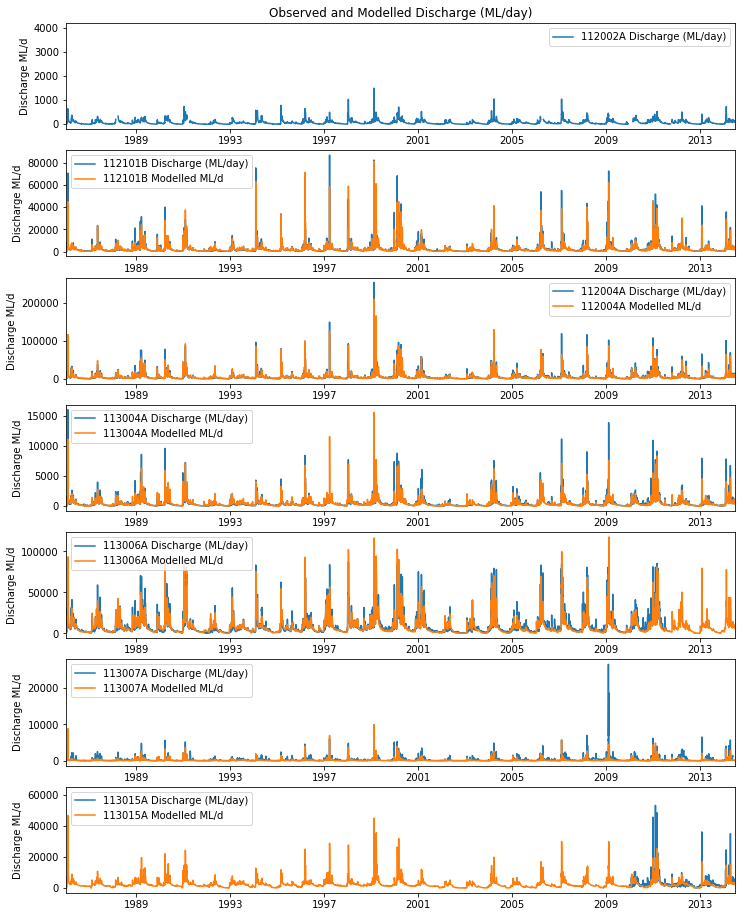

In [217]:
# Create a basic time series plots of the observed and gauged data and show it

G112002A = Obs_gauges['112002A Discharge (ML/day)']
G112101B = Obs_gauges['112101B Discharge (ML/day)']
G112004A = Obs_gauges['112004A Discharge (ML/day)']
G113004A = Obs_gauges['113004A Discharge (ML/day)']
G113006A = Obs_gauges['113006A Discharge (ML/day)']
G113007A = Obs_gauges['113007A Discharge (ML/day)']
G113015A = Obs_gauges['113015A Discharge (ML/day)']

#O112002A = Obs_gauges['112002A ML/d']
O112101B = Mod_gauges['112101B Modelled ML/d']
O112004A = Mod_gauges['112004A Modelled ML/d']
O113004A = Mod_gauges['113004A Modelled ML/d']
O113006A = Mod_gauges['113006A Modelled ML/d']
O113007A = Mod_gauges['113007A Modelled ML/d']
O113015A = Mod_gauges['113015A Modelled ML/d']
#Extra gauges in model
#1120049 ML/d 
#112102A ML/d
#113004A ML/d
#1120054 ML/d


plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')

#plt.figure(1)
ax1 = plt.subplot(711)
plt.plot(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()

ax2 = plt.subplot(712, sharex=ax1)
plt.plot(G112101B)
plt.plot(O112101B)
plt.ylabel('Discharge ML/d')
plt.legend()

ax3 = plt.subplot(713, sharex=ax1)
plt.plot(G112004A)
plt.plot(O112004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax4 = plt.subplot(714, sharex=ax1)
plt.plot(G113004A)
plt.plot(O113004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax5 = plt.subplot(715, sharex=ax1)
plt.plot(G113006A)
plt.plot(O113006A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax6 = plt.subplot(716, sharex=ax1)
plt.plot(G113007A)
plt.plot(O113007A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax7 = plt.subplot(717, sharex=ax1)
plt.plot(G113015A)
plt.plot(O113015A)
plt.ylabel('Discharge ML/d')
plt.legend()

plt.xlim("1986-01-01", "2014-06-30")

(732312.0, 735414.0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


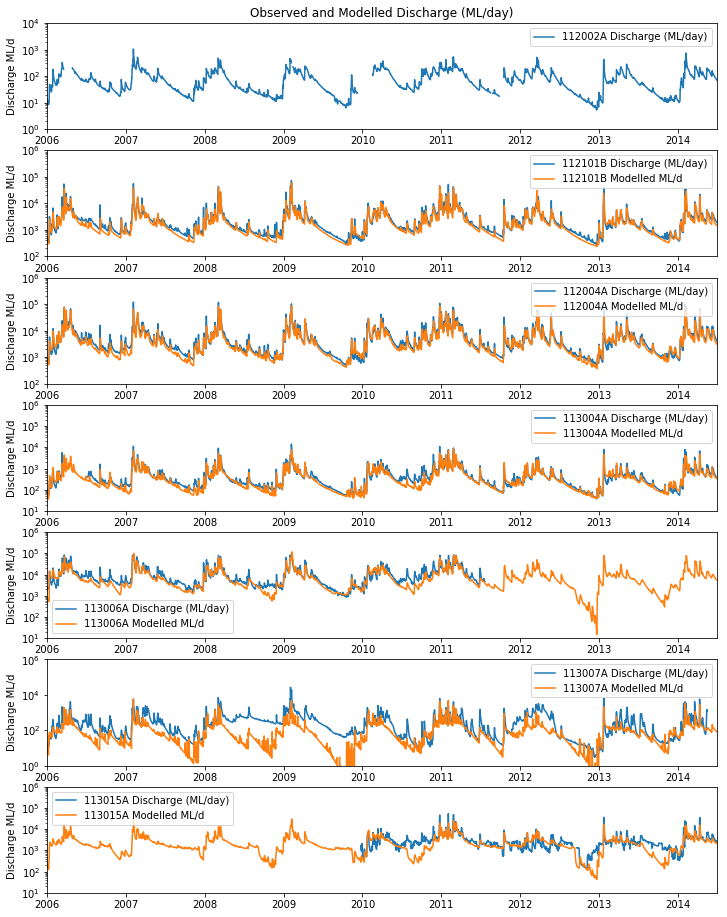

In [35]:
##Now we'll plot the same data, only in log scale and for a shorter period

plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')


#plt.figure(1)
ax1 = plt.subplot(711)
plt.semilogy(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 10000)
plt.xlim([1984, 2015])

ax2 = plt.subplot(712, sharex=ax1)
plt.semilogy(G112101B)
plt.semilogy(O112101B)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax3 = plt.subplot(713, sharex=ax1)
plt.semilogy(G112004A)
plt.semilogy(O112004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax4 = plt.subplot(714, sharex=ax1)
plt.semilogy(G113004A)
plt.semilogy(O113004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax5 = plt.subplot(715, sharex=ax1)
plt.semilogy(G113006A)
plt.semilogy(O113006A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax6 = plt.subplot(716, sharex=ax1)
plt.semilogy(G113007A)
plt.semilogy(O113007A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 1000000)

ax7 = plt.subplot(717, sharex=ax1)
plt.semilogy(G113015A)
plt.semilogy(O113015A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

plt.xlim("2006-01-01", "2014-06-30")

(733773.0, 734684.0)

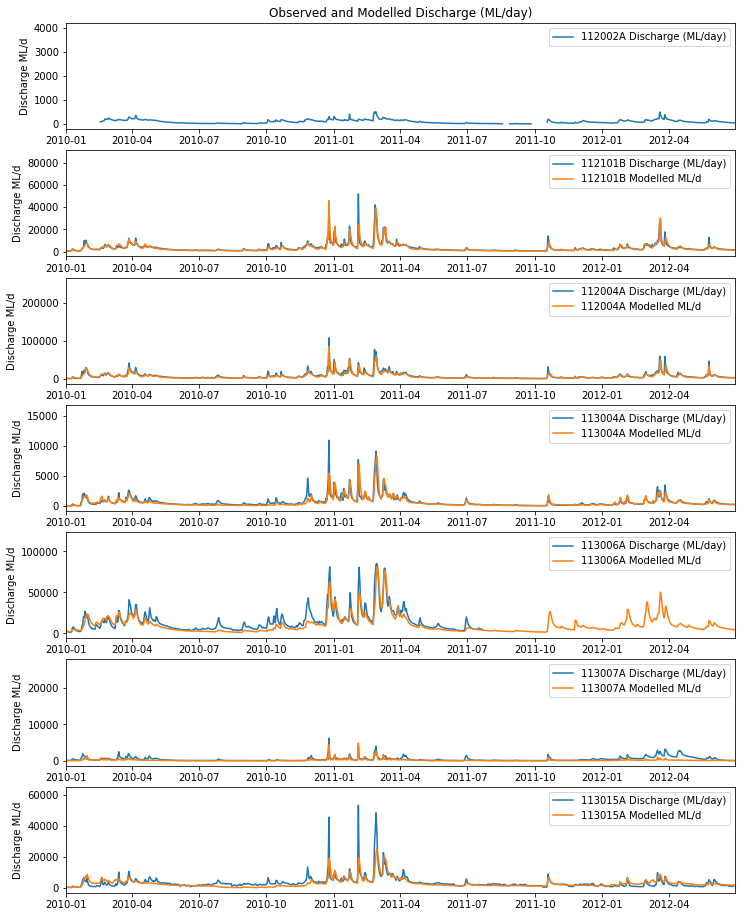

In [38]:
plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')

#plt.figure(1)
ax1 = plt.subplot(711)
plt.plot(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()

ax2 = plt.subplot(712, sharex=ax1)
plt.plot(G112101B)
plt.plot(O112101B)
plt.ylabel('Discharge ML/d')
plt.legend()

ax3 = plt.subplot(713, sharex=ax1)
plt.plot(G112004A)
plt.plot(O112004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax4 = plt.subplot(714, sharex=ax1)
plt.plot(G113004A)
plt.plot(O113004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax5 = plt.subplot(715, sharex=ax1)
plt.plot(G113006A)
plt.plot(O113006A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax6 = plt.subplot(716, sharex=ax1)
plt.plot(G113007A)
plt.plot(O113007A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax7 = plt.subplot(717, sharex=ax1)
plt.plot(G113015A)
plt.plot(O113015A)
plt.ylabel('Discharge ML/d')
plt.legend()

plt.xlim("2010-01-01", "2012-06-30")

### Calculate and plot flow duration curves

The next few cells calculate the flow duration curves for measured and modelled time series. In this example, we make a program that can be called later on in the notebook. 

The steps to creating the FDCs is to first limit the observed time series to the model period to ensure we are comparing the same time periods, remove na values, sort and rank the values, calculate probabilities and then plot the data

In [23]:
# This is now redundant code.......
# first we limit the observed data to the available modelled data period
# Limited_obs=Obs_gauges.truncate('1986-01-01', '2014-06-30')
# Check that it has done what we thought it should
# Limited_obs.plot()

In [24]:
def FlowDurationCurve(dfo,obs_site,dfm,mod_site,begyear,endyear):

#    Generate observed and modelled flow duration curve for hydrologic time series data
    
#    FlowDurationCurve = pandas dataframe containing data
#    Obs_site = column within dataframe that contains the observed flow values
#    Mod_site = column within dataframe that contains the modelled flow values
#    begyear = start year for analysis
#    endyear = end year for analysis

#trim the time series to beginning and end dates
    obsdata = dfo[(dfo.index.to_datetime() > pd.datetime(begyear,1,1))&(dfo.index.to_datetime() < pd.datetime(endyear,1,1))]
    moddata = dfm[(dfm.index.to_datetime() > pd.datetime(begyear,1,1))&(dfm.index.to_datetime() < pd.datetime(endyear,1,1))]

#remove na values from the observed data
    obsdata = obsdata[obs_site].dropna().values
    moddata = moddata[mod_site].dropna().values

#Sort and rank the observed and modelled data    
    obsdata = np.sort(obsdata)
    moddata = np.sort(moddata)
    
    obsranks = sp.rankdata(obsdata, method='average')
    obsranks = obsranks[::-1]

    modranks = sp.rankdata(moddata, method='average')
    modranks = modranks[::-1]

#calculate the probabilities    
    obsprob = [100*(obsranks[i]/(len(obsdata)+1)) for i in range(len(obsdata)) ]
    modprob = [100*(modranks[i]/(len(moddata)+1)) for i in range(len(moddata)) ]
    
#Plot the flow duration curves data    
    plt.figure(figsize=(12,6))
    plt.scatter(obsprob,obsdata,label=obs_site)
    plt.scatter(modprob,moddata,label=mod_site)
    plt.yscale('log')
    plt.grid(which = 'both')
    plt.xlabel('% of time that indicated discharge was exceeded or equaled')
    plt.ylabel('discharge (ML/d)')
    plt.xticks(range(0,100,5))
    plt.title('Flow duration curve for ' + obs_site)       
    
# output the data?? TBC

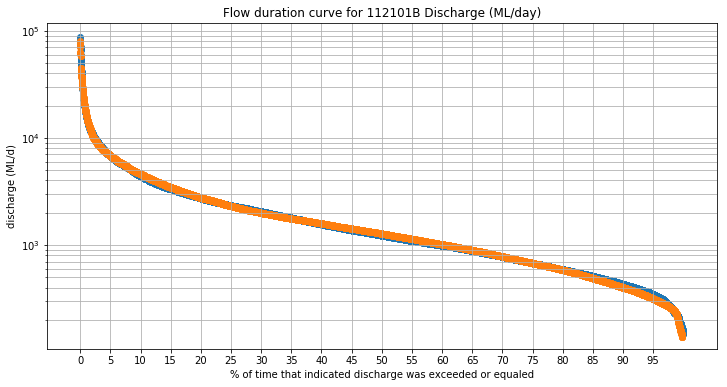

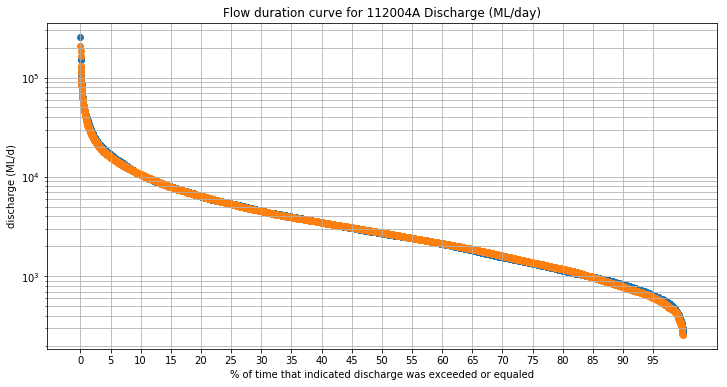

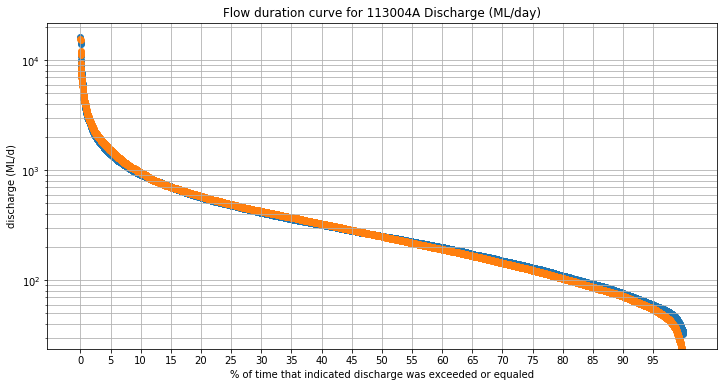

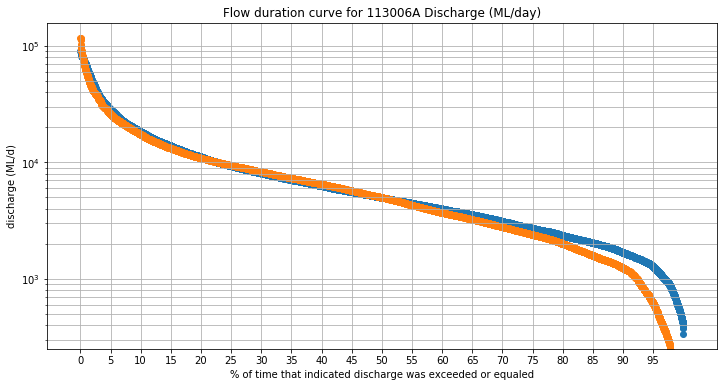

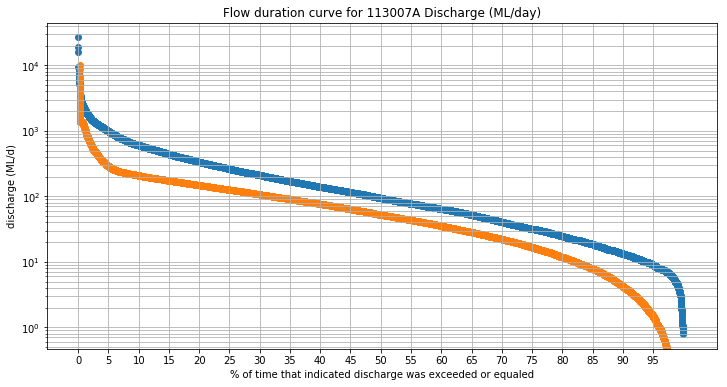

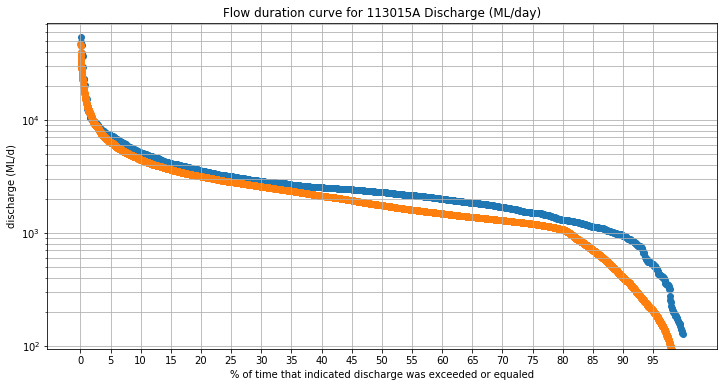

In [25]:
# Calculate and plot the modelled and measured flow duration curves

FlowDurationCurve(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'112004A Discharge (ML/day)',Mod_gauges,'112004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113004A Discharge (ML/day)',Mod_gauges,'113004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113006A Discharge (ML/day)',Mod_gauges,'113006A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113007A Discharge (ML/day)',Mod_gauges,'113007A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113015A Discharge (ML/day)',Mod_gauges,'113015A Modelled ML/d',1986, 2014)


### Calculate model performance statistics for hydrology

The next describes a program to calculate correlation statistics for model hydrological performance and make some plots with the data. 



In [26]:
def CorrelationStats(dfo,obs_site,dfm,mod_site):

    #Compare modeleld and measured data

    #limit the analysis to the gauge in question
    dfo =dfo[obs_site]
    dfm =dfm[mod_site]
    
    #remove na values from the observed data
    dfa = dfo.dropna()   
    
    #Join the observed and modeled dataframes
    dfd = pd.concat([dfa, dfm], axis=1, join='inner')
    
    # Percent bias
    percentbias = 100.0*sum(dfd[mod_site]-dfd[obs_site])/sum(dfd[obs_site])
    abspercbias = 100.0*sum(abs(dfd[mod_site]-dfd[obs_site]))/sum(dfd[obs_site])
    DailyRMSE = np.sqrt(np.mean((dfd[mod_site]-dfd[obs_site])**2))
    DailyNSE = 1 - sum((dfd[mod_site]-dfd[obs_site])**2)/sum((dfd[obs_site]-np.mean(dfd[obs_site]))**2)

#convert to monthly data

    dfde = dfd.resample('M').mean()
    #remove na values from the observed data
    dfdm = dfde.dropna() 
    
    MonthlyRMSE = np.sqrt(np.mean((dfdm[mod_site]-dfdm[obs_site])**2))
    MonthlyNSE = 1 - sum((dfdm[mod_site]-dfdm[obs_site])**2)/sum((dfdm[obs_site]-np.mean(dfdm[obs_site]))**2)

#do cumulative plots
    dfdsum = dfd.cumsum()


    print(obs_site)
    print('percent bias =',round(percentbias,2))
    #    print(abspercbias)
    print('RMSE daily flows =',round(DailyRMSE,0))
    print('Daily Nash Sutcliffe Efficiency =',round(DailyNSE,3))
    print('RMSE Monthly flows =',round(MonthlyRMSE,0))
    print('Monthly Nash Sutcliffe Efficiency =',round(MonthlyNSE,3))
    print()
    
    #Plot the time series, cumulative flows, monthly and daily x-y scatter   
    
    plt.figure(figsize=(15,5))
    plt.grid(which = 'both')
    plt.plot(dfd[obs_site])
    plt.plot(dfd[mod_site])
    plt.xlabel('Date')
    plt.ylabel('Discharge (ML/d)')
    plt.title('Modelled and measured discharge for ' + obs_site)
    plt.legend()
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1, 3 ,1)
    plt.scatter(dfd[obs_site],dfd[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfd[obs_site].max()],[0,dfd[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/d)')
    plt.ylabel('Modelled Discharge (ML/d)')
    plt.title('Daily correlation ' + obs_site)
    
    plt.subplot(1, 3, 2)
    plt.scatter(dfdm[obs_site],dfdm[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdm[obs_site].max()],[0,dfdm[obs_site].max()],'r')
    plt.xlabel('Observed discharge (ML/month)')
    plt.ylabel('Modelled Discharge (ML/month)')
    plt.title('Monthly correlation ' + obs_site)
    
    plt.subplot(1, 3, 3)
    plt.scatter(dfdsum[obs_site],dfdsum[mod_site])
    plt.grid(which = 'both')
    plt.plot([0,dfdsum[obs_site].max()],[0,dfdsum[obs_site].max()],'r')
    plt.xlabel('Cumulative Observed discharge (ML)')
    plt.ylabel('Cumulative Modelled Discharge (ML)')
    plt.title('Cumulative ' + obs_site)
    
    plt.tight_layout()
    
    #plt.scatter(obsprob,obsdata,label=obs_site)
    #plt.plot(dfdm[obs_site])
    #plt.plot(dfdm[mod_site])


Test the program on a single gauge site before rolling out to all sites

112101B Discharge (ML/day)
percent bias = -1.34
RMSE daily flows = 1793.0
Daily Nash Sutcliffe Efficiency = 0.785
RMSE Monthly flows = 468.0
Monthly Nash Sutcliffe Efficiency = 0.961



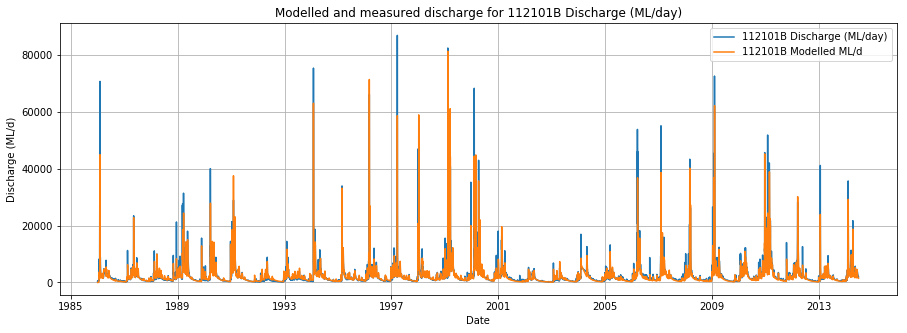

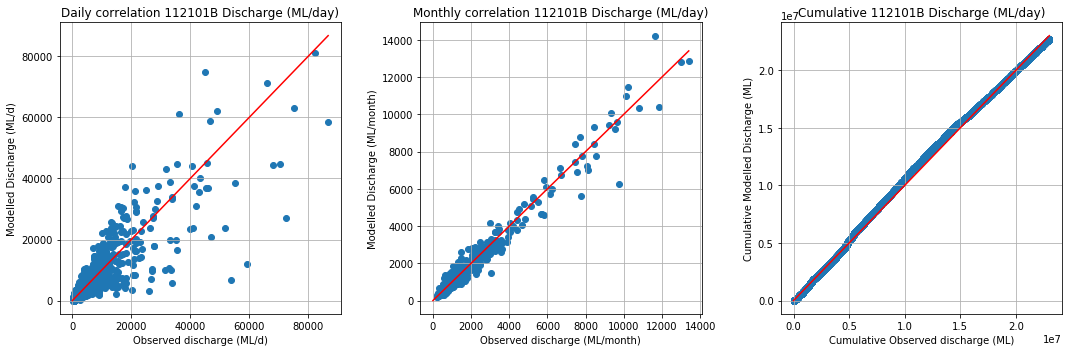

In [218]:
CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')

Now calculate the stats for all sites

112101B Discharge (ML/day)
percent bias = -1.34
RMSE daily flows = 1793.0
Daily Nash Sutcliffe Efficiency = 0.785
RMSE Monthly flows = 468.0
Monthly Nash Sutcliffe Efficiency = 0.961

112004A Discharge (ML/day)
percent bias = -1.87
RMSE daily flows = 3650.0
Daily Nash Sutcliffe Efficiency = 0.817
RMSE Monthly flows = 975.0
Monthly Nash Sutcliffe Efficiency = 0.968

113004A Discharge (ML/day)
percent bias = -0.94
RMSE daily flows = 421.0
Daily Nash Sutcliffe Efficiency = 0.68
RMSE Monthly flows = 145.0
Monthly Nash Sutcliffe Efficiency = 0.907

113006A Discharge (ML/day)
percent bias = -2.01
RMSE daily flows = 4363.0
Daily Nash Sutcliffe Efficiency = 0.85
RMSE Monthly flows = 2481.0
Monthly Nash Sutcliffe Efficiency = 0.911

113007A Discharge (ML/day)
percent bias = -56.25
RMSE daily flows = 502.0
Daily Nash Sutcliffe Efficiency = 0.31
RMSE Monthly flows = 326.0
Monthly Nash Sutcliffe Efficiency = 0.273

113015A Discharge (ML/day)
percent bias = -17.24
RMSE daily flows = 2356.0
Daily Na

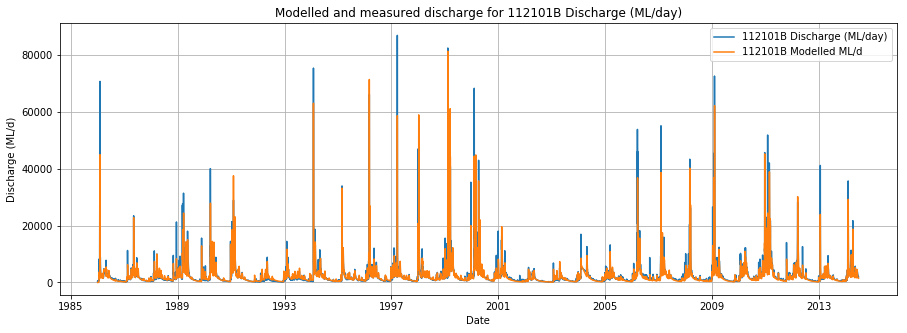

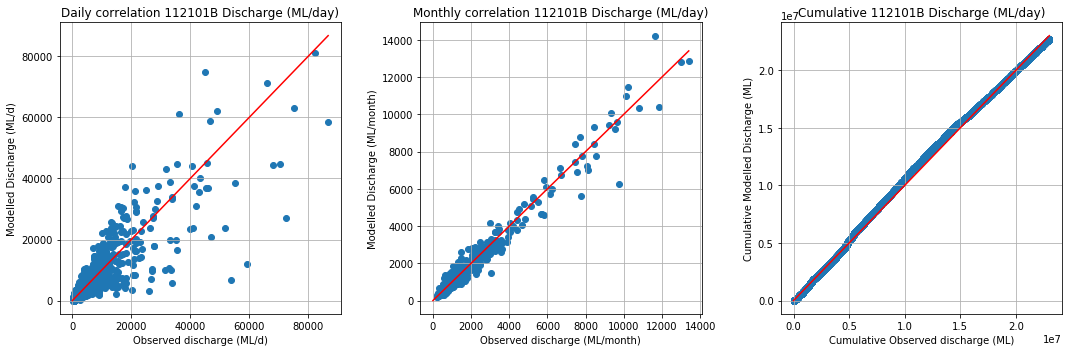

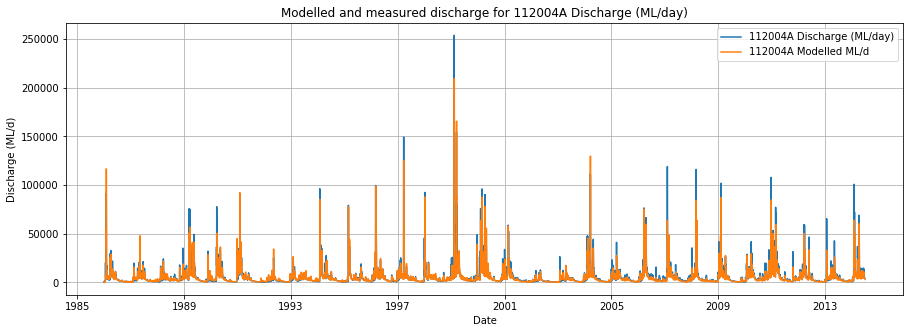

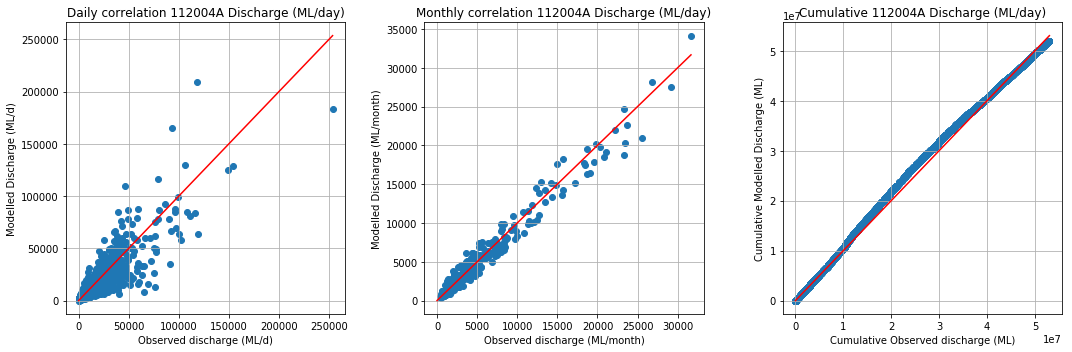

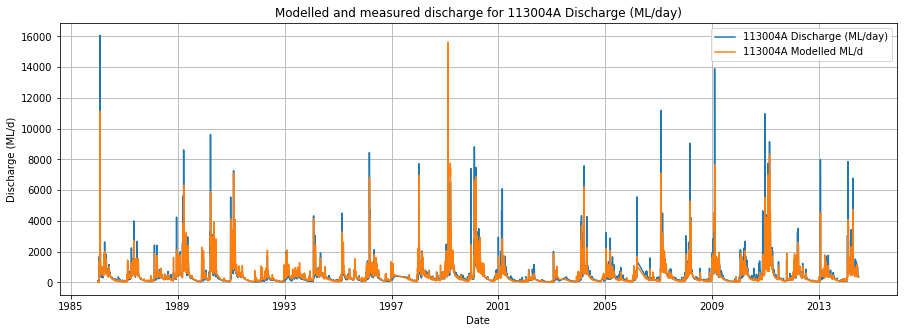

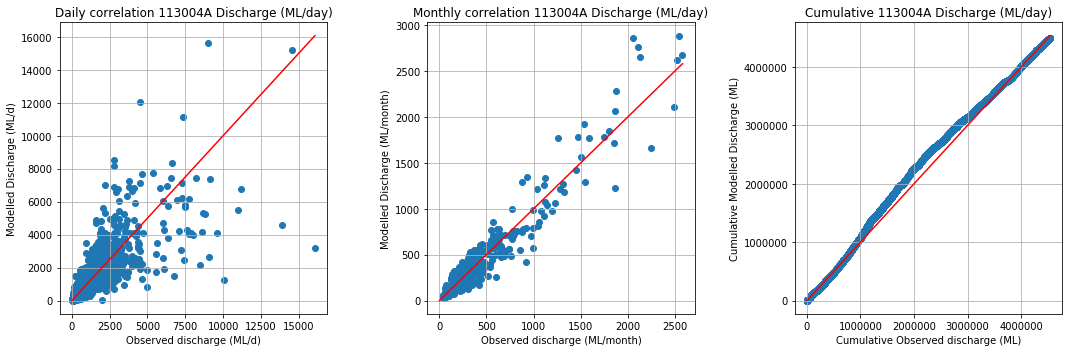

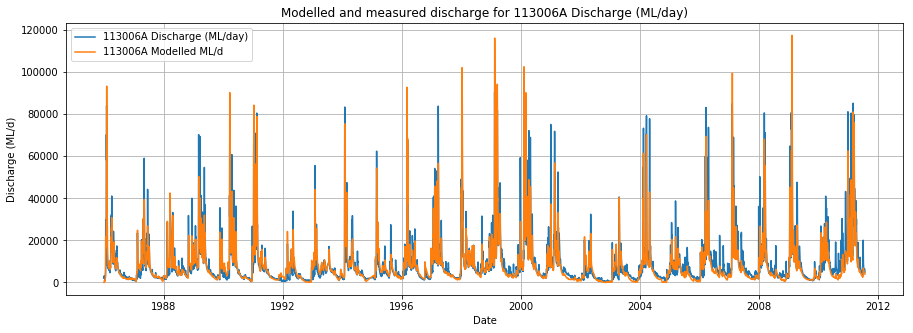

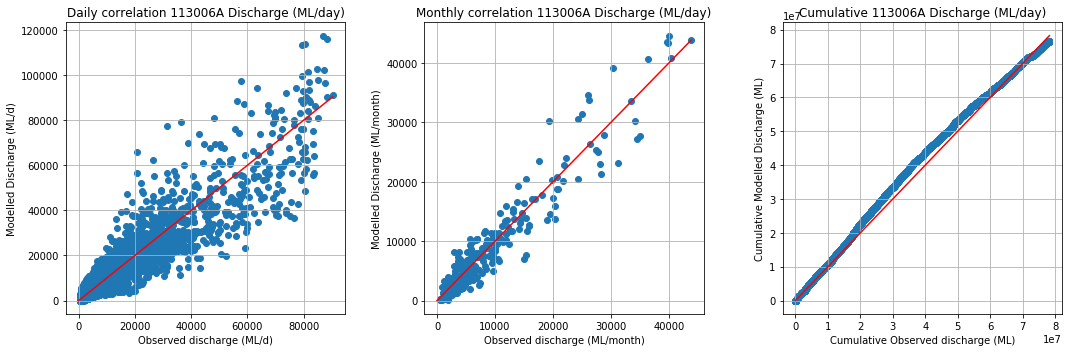

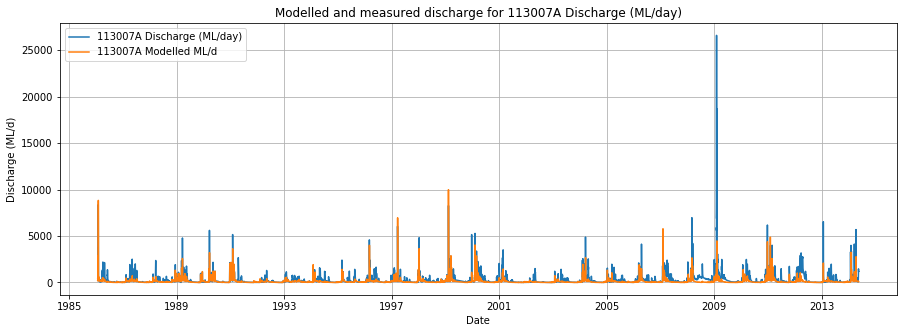

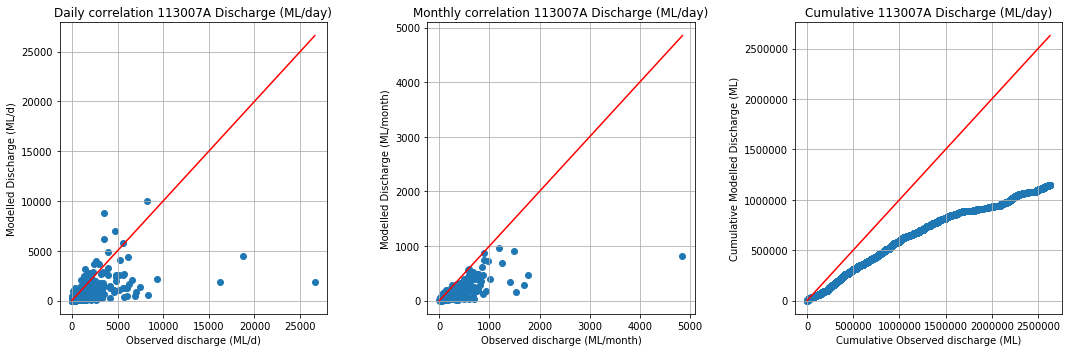

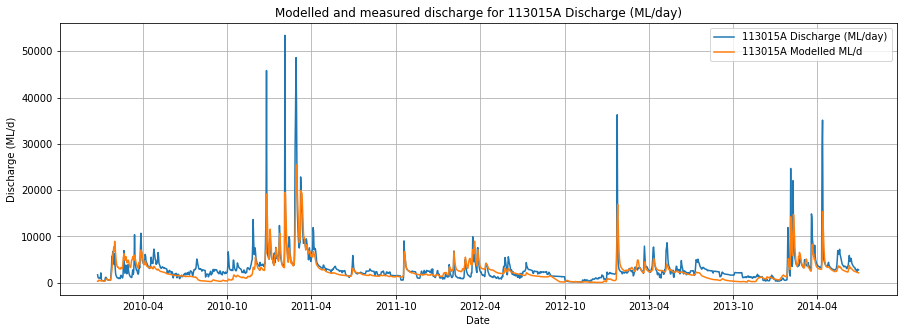

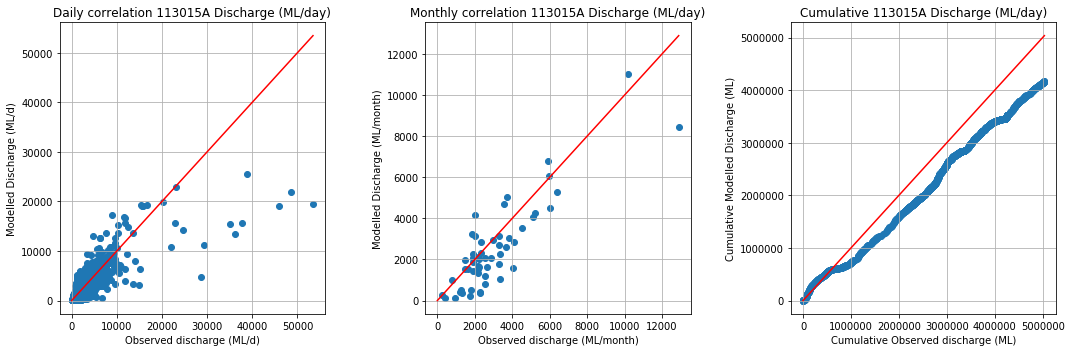

In [219]:
# Calculate and plot the modelled and measured daily statistics

CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')
CorrelationStats(Obs_gauges,'112004A Discharge (ML/day)',Mod_gauges,'112004A Modelled ML/d')
CorrelationStats(Obs_gauges,'113004A Discharge (ML/day)',Mod_gauges,'113004A Modelled ML/d')
CorrelationStats(Obs_gauges,'113006A Discharge (ML/day)',Mod_gauges,'113006A Modelled ML/d')
CorrelationStats(Obs_gauges,'113007A Discharge (ML/day)',Mod_gauges,'113007A Modelled ML/d')
CorrelationStats(Obs_gauges,'113015A Discharge (ML/day)',Mod_gauges,'113015A Modelled ML/d')


<h1><center></center></h1>
<h1><center>Part 3: Calculating plugin parameters for runoff and drainage</center></h1>

In this module, the model generated sacramento sugarcane FU runoff for every subcatchment in the model is imported to the notebook. In this case, we import both the total runoff and baseflow so that we can loot at the ratio of baseflow to total runoff for the current model and compare this to the sacramento proportions we are looking to include to match it. 

The first couple of cells in this module are focussed on file manipulation of the modelled the series. This is to allow us to use some simple text string recognition code elements to match up APSIM and Source time series. The main routine that follows (Sac_surface_runoff) then loops through the list of subcatchments, searching first for regions, then subcatchments to multiply the sacramento modelled total runoff (mm) by area to get total runoff by region. The same is done for APSIM runoff and drainage time series. A key to this process is a reference file with subcatchment number, area and region, in addition to the sacramento paremeters. An example of this key file is attached with the files of this notebook. 

The Sac_surface_runoff routine then sums up the runoff by region and calculates the amount of APSIM drainage to add so that the total APSIM runoff matches the total Sacramento runoff. The resultant output is DR, the drainage delivery ratio that can be entered directlybv in the plugin in addition to the DSE and SSE (drainage store emptying ratio and surface store emptying ratio) which are taken directly from the regionalised sacramento parameters. 

In [13]:
## Import the Sacramento Sugarcane runoff (total) and baseflow time series from the model

Sac_cane=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/Sac_modelled_SC_runoff.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
Sac_cane.index = Sac_cane.Date

# Remove the Date column from the data columns
del Sac_cane['Date']

# get some basic stats on the whole modelled time series dataframe
#Sac_cane.describe()

#Drop the colums that have no data. only do this afer loading the data. 
Sac_cane.drop([col for col, val in Sac_cane.sum().iteritems() if val < 0.01], axis=1, inplace=True)
#Sac_cane.describe()

#Export the new dataframe - do this if you want to check the data
#Sac_cane.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/Sac_cane_mm-d.csv", index=True)

Sac_col_list = list(Sac_cane)
#print(Sac_col_list)
Sac_col_list1 = [word.replace('sugarcane > ', '') for word in Sac_col_list]
#print(Sac_col_list1)

#Rename the columns according to the file names in the new list so we dont get confused on which file is which
Sac_cane.columns = [Sac_col_list1]
#Sac_cane.describe()


In [15]:
#Just get the baseflows out
Sac_cane_baseflow = Sac_cane.filter(regex='Baseflow')
Sac_cane_total = Sac_cane.filter(regex='Runoff')

Sac_bflist = list(Sac_cane_baseflow)

#Sac_cane_baseflow.describe()

This next cell loads the areas_ha csv file. This must be prepared manually at the moment and needs some care to ensure it has the same or simila rformat to the example in this notebook

In [540]:
areas_ha=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/sugarcane_areas.csv")

In [585]:
# This module attempts to calculate the accumulated runoff from sacramento and APSIM 
# according to region from the mm runoff and drainage time series as well as the modelled
# sacramento time series. the idea to to work out the % surface runoff and drainage to apply 
# from APSIM to get the same runoff colume on a region basis. 
# Typically done in a spreadhseet...but here goes anyway

def Sac_surface_runoff(dfbaseflow,dftotal,apsimdr,apsimsr,areas):
    
    #grab a subcatchment list
    #step through the list searching for 

    ## Import the Sacramento Sugarcane subcatchments and areas 

    #grab a list of subcatchments
    
    #SC = areas.filter(regex='Subcatchment')
    SC_list = areas["Subcatchment"].tolist()
    area_list = areas["Area_ha"].tolist()
    #region_list = areas["Region"].tolist()
    region_list = [1,2,3,4,5,6,7,8,9,10] # extend this list of there are more than 10 regions
    
    for r in (region_list):
                
        rareas = areas.loc[areas['Region'] == r]
    
        SC_listr = rareas["Subcatchment"].tolist()
        area_listr = rareas["Area_ha"].tolist()
         
        ds = []
        db = []
        dfad = []
        dfas = []
        dfar = []
    
        for s, a in zip(SC_listr,area_listr):
            #calculate the total runoff volume
            dfb = [dfbaseflow.filter(regex=s)*a]
            dft = [dftotal.filter(regex=s)*a]
            #df  = pd.concat([dfbaseflow.filter(regex=s)*a,dftotal.filter(regex=s)*a], axis = 1)
            df  = pd.concat([dftotal.filter(regex=s)*a], axis = 1)
            ds.append(df.sum(axis=1))
            
            #calculate the total baseflow volume
            dfb  = pd.concat([dfbaseflow.filter(regex=s)*a], axis = 1)
            db.append(dfb.sum(axis=1))
                               
            #calculate the total APSIM drainage runoff
            dfapsd = [apsimdr.filter(regex=s)*a]
            dfads  = pd.concat([apsimdr.filter(regex=s)*a], axis = 1)
            dfad.append(dfads)
                    
            #Calculate the total APSIM runoff
            dfapsr = [apsimsr.filter(regex=s)*a]
            dfars  = pd.concat([apsimsr.filter(regex=s)*a], axis = 1)
            dfar.append(dfars)
            
            # Concatenate all data into individual dataframes on the date axis
            apsim_drainage = pd.concat(dfad, axis=1)
            apsim_runoff = pd.concat(dfar, axis=1) 
            modelled_runoff = pd.concat(ds, axis=1)
            modelled_baseflow = pd.concat(db, axis=1)
            
        mr = (pd.DataFrame(modelled_runoff)).sum()
        mrsum = mr.sum()
        mb = (pd.DataFrame(modelled_baseflow)).sum()
        mbsum = mb.sum()
        ad = (pd.DataFrame(apsim_drainage)).sum()
        adsum = ad.sum()
        ar = (pd.DataFrame(apsim_runoff)).sum()
        arsum = ar.sum() 
        apsimdrain = (mrsum-arsum)/adsum
        
        #print(areas.loc[areas['Region']==r])
        print("Region = " ,rareas["Region"].mean())
        print("Total modelled surface runoff = ", round(mrsum-mbsum,0))
        print("Total modelled baseflow = ", round(mbsum,0))
        print("Modelled baseflow proportion = ", round(mbsum/mrsum,2))
        print("APSIM surface runoff = ", round(arsum,0))
        print("APSIM drainage = ", round(adsum,0))
        print("APSIM baseflow proportion = ", round(adsum*apsimdrain/(adsum*apsimdrain+arsum),2))
        print() 
        
        # now output suggested parameters for the plugin
        print("Percentage APSIM drainage to apply = ", round(((mrsum-arsum)/adsum),3))
        print("Suggested surface store emptying ratio = ", round(rareas["UH1"].mean(),4)," - UH1 from the Sacramento parameters")
        print("Suggested baseflow store emptying ratio = ", round(rareas["Lzpk"].mean(),4)," to ",round(rareas["Lzsk"].mean(),4))
        print()      

    

In [583]:
Sac_surface_runoff(Sac_cane_baseflow,Sac_cane_total,DrainageTimeseries,RunoffTimeseries,areas_ha)

Region =  1.0
Total modelled surface runoff =  648611626.0
Total modelled baseflow =  719364194.0
Modelled baseflow proportion =  0.53
APSIM surface runoff =  502650171.0
APSIM drainage =  839798983.0
APSIM baseflow proportion =  0.63

Percentage APSIM drainage to apply =  1.03
Suggested surface store emptying ratio =  1.0  - UH1 from the Sacramento parameters
Suggested baseflow store emptying ratio =  0.0318  to  0.0042

Region =  2.0
Total modelled surface runoff =  384990100.0
Total modelled baseflow =  394608986.0
Modelled baseflow proportion =  0.51
APSIM surface runoff =  202011323.0
APSIM drainage =  636751299.0
APSIM baseflow proportion =  0.74

Percentage APSIM drainage to apply =  0.907
Suggested surface store emptying ratio =  0.9998  - UH1 from the Sacramento parameters
Suggested baseflow store emptying ratio =  0.0227  to  0.0049

Region =  nan
Total modelled surface runoff =  384990100.0
Total modelled baseflow =  394608986.0
Modelled baseflow proportion =  0.51
APSIM sur

In [584]:
# Now create the input file necessary to import the required amount of surface and drainage 
# bit complicated to implement in the notebook now, so lets just do it outside and get the data comparisions done

Using the output in the above output, the hydrology component of the plugin can be paremeterised. The next module assesses the performance of this parameterisation. 

<h1><center></center></h1>
<h1><center>Part 4: Assessing APSIM to Source hydrology performance</center></h1>

In this module, the paddock model generated sugarcane runoff is now in the Source model and the hydrology performance is reassessed against gauge data once again. time series plots on normal and log scale are generated, flow duration curves and model stats are calcaulated once again.  

In [41]:
# Import the APSIM modelled data corresponding to gauge sites to the notebook

mod_aps_gauges=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/Modelled_Flows_ML-d_APSIM.csv",parse_dates=['Date'])

#Now make the dates column as the index so we can do time series plots and analysis on it
mod_aps_gauges.index = mod_aps_gauges.Date

# Remove the Date column from the data columns
del mod_aps_gauges['Date']

# get some basic stats on the whole modelled time series dataframe
#mod_aps_gauges.describe()

(725007.0, 735414.0)

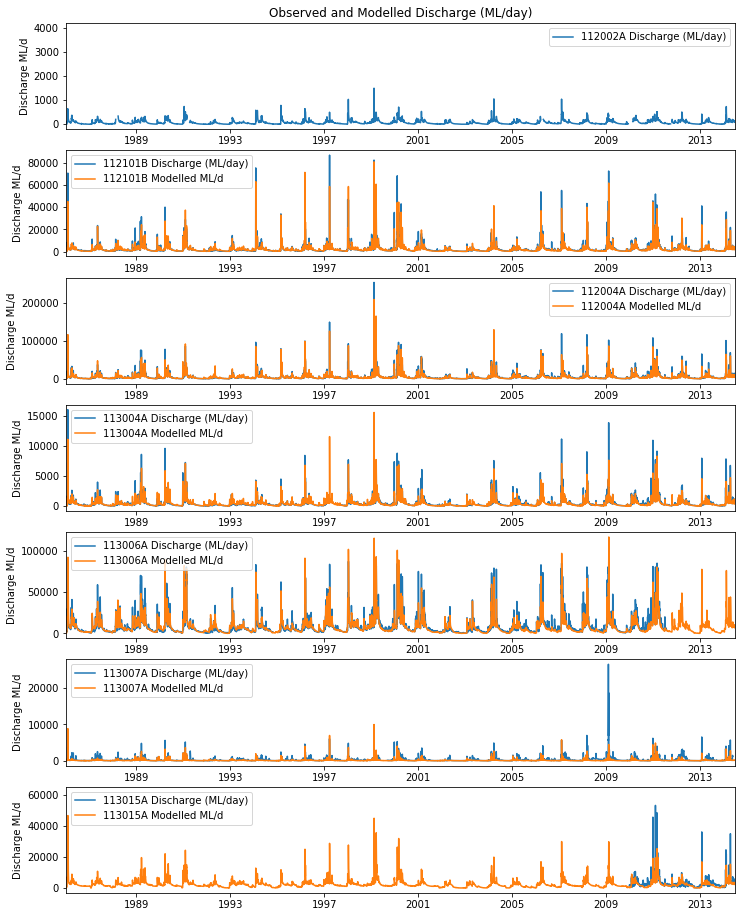

In [42]:
# Create a basic time series plots of the observed and gauged data and show it
# plot new flow duration curves
# plot new NSE stats an cumulative curves
# CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')

A112101B = mod_aps_gauges['112101B Modelled ML/d']
A112004A = mod_aps_gauges['112004A Modelled ML/d']
A113004A = mod_aps_gauges['113004A Modelled ML/d']
A113006A = mod_aps_gauges['113006A Modelled ML/d']
A113007A = mod_aps_gauges['113007A Modelled ML/d']
A113015A = mod_aps_gauges['113015A Modelled ML/d']


plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')

#plt.figure(1)
ax1 = plt.subplot(711)
plt.plot(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()

ax2 = plt.subplot(712, sharex=ax1)
plt.plot(G112101B)
plt.plot(A112101B)
plt.ylabel('Discharge ML/d')
plt.legend()

ax3 = plt.subplot(713, sharex=ax1)
plt.plot(G112004A)
plt.plot(A112004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax4 = plt.subplot(714, sharex=ax1)
plt.plot(G113004A)
plt.plot(A113004A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax5 = plt.subplot(715, sharex=ax1)
plt.plot(G113006A)
plt.plot(A113006A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax6 = plt.subplot(716, sharex=ax1)
plt.plot(G113007A)
plt.plot(A113007A)
plt.ylabel('Discharge ML/d')
plt.legend()

ax7 = plt.subplot(717, sharex=ax1)
plt.plot(G113015A)
plt.plot(A113015A)
plt.ylabel('Discharge ML/d')
plt.legend()

plt.xlim("1986-01-01", "2014-06-30")

(732312.0, 735414.0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


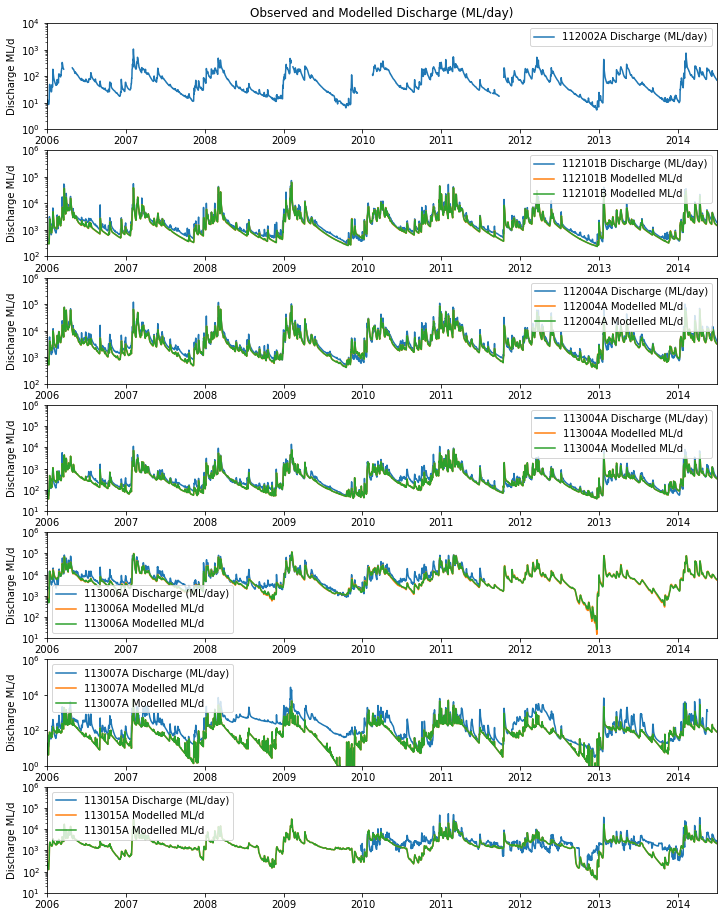

In [44]:
##Now we'll plot the same data, only in log scale and for a shorter period

plt.figure(figsize=(12,16))
plt.title('Observed Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')


#plt.figure(1)
ax1 = plt.subplot(711)
plt.semilogy(G112002A)
plt.title('Observed and Modelled Discharge (ML/day)')
plt.xlabel('Date')
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 10000)
plt.xlim([1984, 2015])

ax2 = plt.subplot(712, sharex=ax1)
plt.semilogy(G112101B)
plt.semilogy(O112101B)
plt.semilogy(A112101B)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax3 = plt.subplot(713, sharex=ax1)
plt.semilogy(G112004A)
plt.semilogy(O112004A)
plt.semilogy(A112004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(100, 1000000)

ax4 = plt.subplot(714, sharex=ax1)
plt.semilogy(G113004A)
plt.semilogy(O113004A)
plt.semilogy(A113004A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax5 = plt.subplot(715, sharex=ax1)
plt.semilogy(G113006A)
plt.semilogy(O113006A)
plt.semilogy(A113006A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

ax6 = plt.subplot(716, sharex=ax1)
plt.semilogy(G113007A)
plt.semilogy(O113007A)
plt.semilogy(A113007A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(1, 1000000)

ax7 = plt.subplot(717, sharex=ax1)
plt.semilogy(G113015A)
plt.semilogy(O113015A)
plt.semilogy(A113015A)
plt.ylabel('Discharge ML/d')
plt.legend()
plt.ylim(10, 1000000)

plt.xlim("2006-01-01", "2014-06-30")

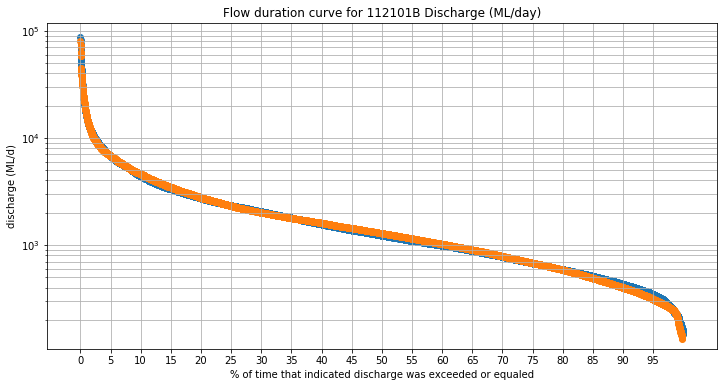

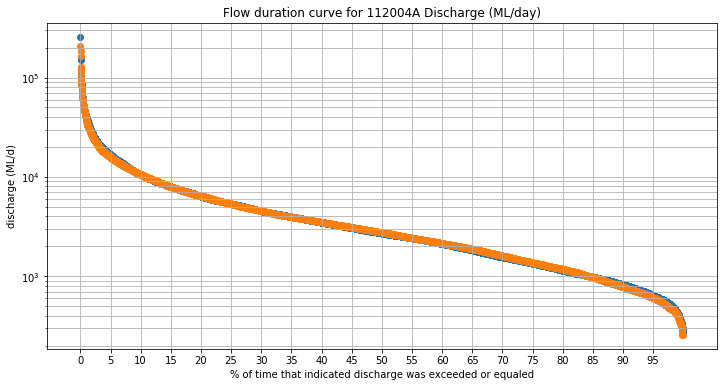

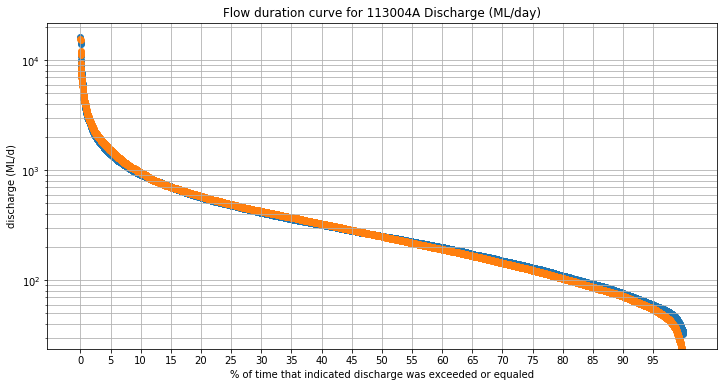

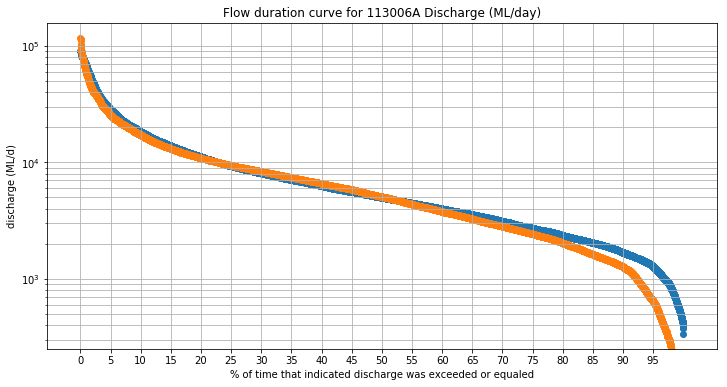

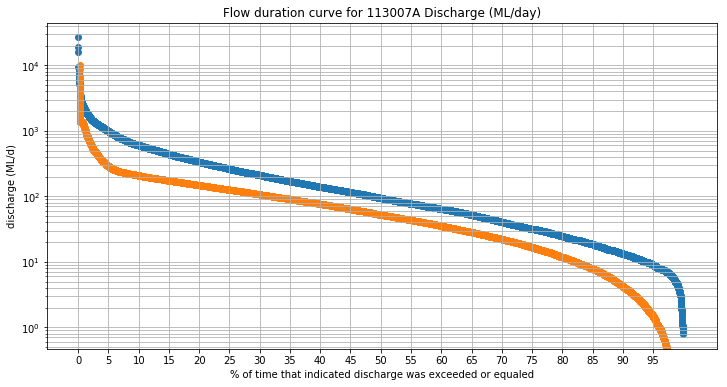

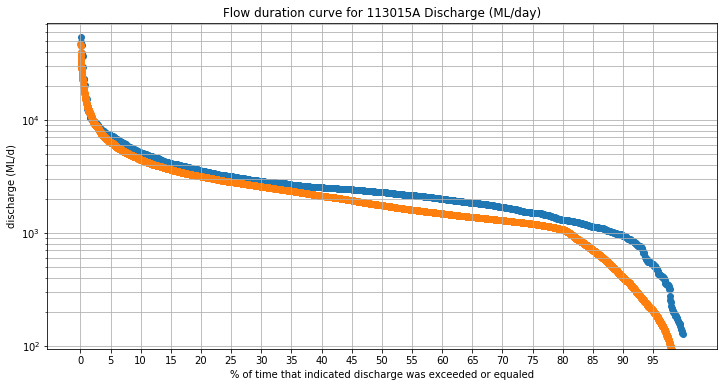

In [30]:
# Calculate and plot the modelled and measured flow duration curves for APSIM integrated model

FlowDurationCurve(Obs_gauges,'112101B Discharge (ML/day)',mod_aps_gauges,'112101B Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'112004A Discharge (ML/day)',mod_aps_gauges,'112004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113004A Discharge (ML/day)',mod_aps_gauges,'113004A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113006A Discharge (ML/day)',mod_aps_gauges,'113006A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113007A Discharge (ML/day)',mod_aps_gauges,'113007A Modelled ML/d',1986, 2014)
FlowDurationCurve(Obs_gauges,'113015A Discharge (ML/day)',mod_aps_gauges,'113015A Modelled ML/d',1986, 2014)

112101B Discharge (ML/day)
percent bias = -1.34
RMSE daily flows = 1773.0
Daily Nash Sutcliffe Efficiency = 0.79
RMSE Monthly flows = 463.0
Monthly Nash Sutcliffe Efficiency = 0.961

112004A Discharge (ML/day)
percent bias = -1.8
RMSE daily flows = 3636.0
Daily Nash Sutcliffe Efficiency = 0.818
RMSE Monthly flows = 971.0
Monthly Nash Sutcliffe Efficiency = 0.968

113004A Discharge (ML/day)
percent bias = -0.94
RMSE daily flows = 421.0
Daily Nash Sutcliffe Efficiency = 0.68
RMSE Monthly flows = 145.0
Monthly Nash Sutcliffe Efficiency = 0.907

113006A Discharge (ML/day)
percent bias = -2.29
RMSE daily flows = 4324.0
Daily Nash Sutcliffe Efficiency = 0.853
RMSE Monthly flows = 2364.0
Monthly Nash Sutcliffe Efficiency = 0.919

113007A Discharge (ML/day)
percent bias = -56.25
RMSE daily flows = 502.0
Daily Nash Sutcliffe Efficiency = 0.31
RMSE Monthly flows = 326.0
Monthly Nash Sutcliffe Efficiency = 0.273

113015A Discharge (ML/day)
percent bias = -17.24
RMSE daily flows = 2356.0
Daily Nas

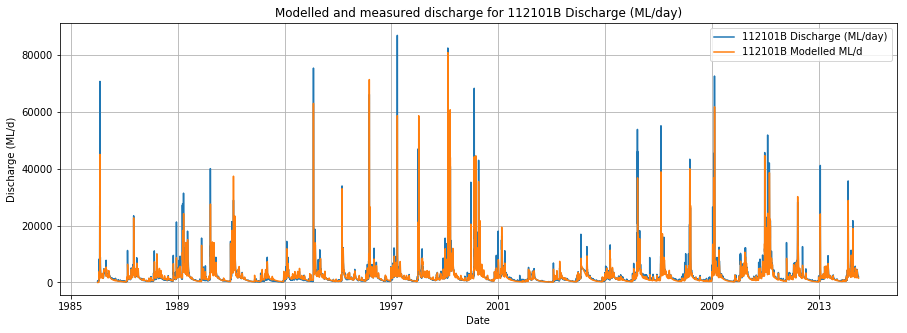

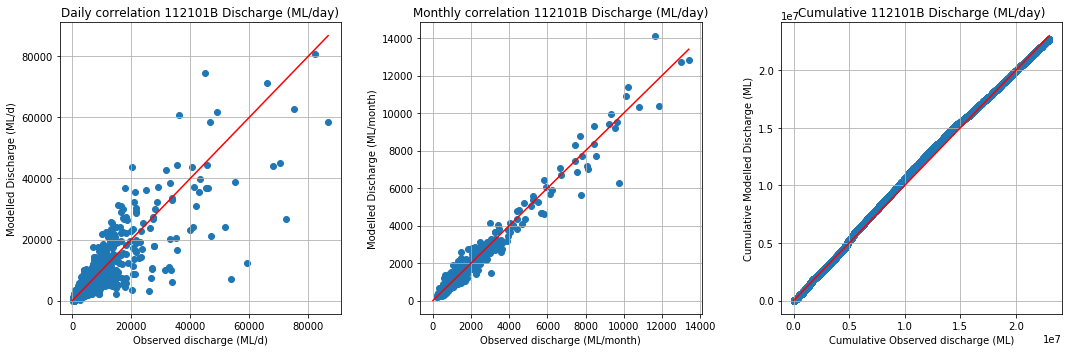

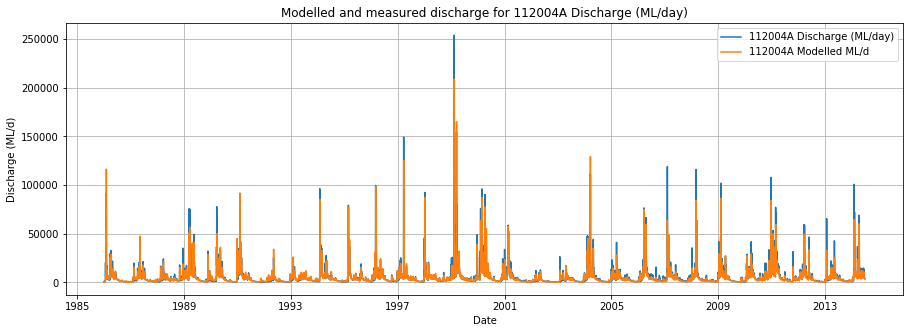

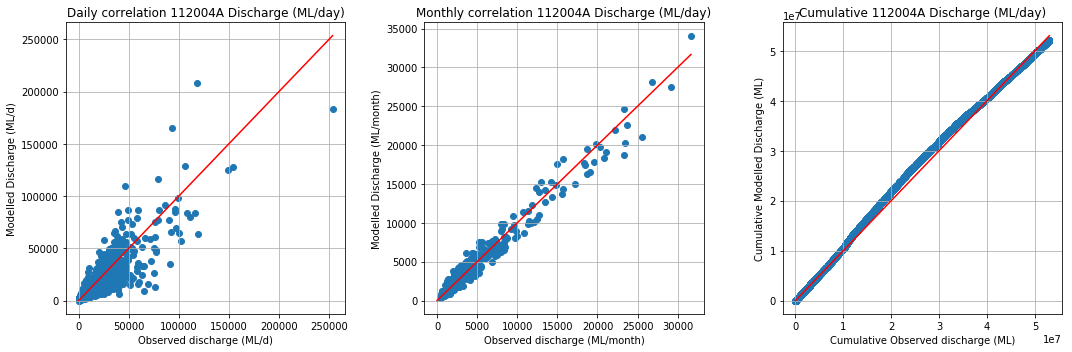

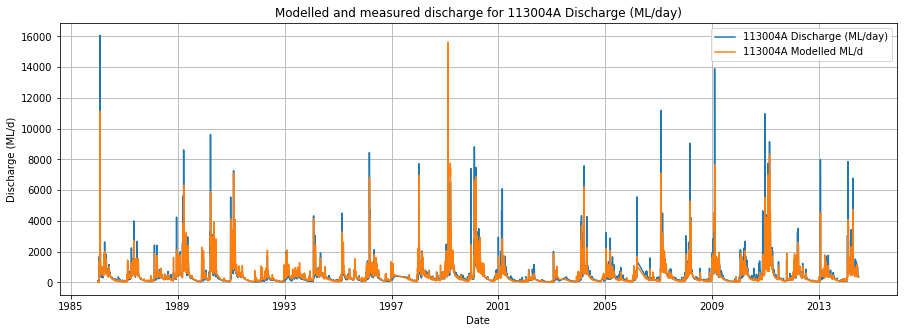

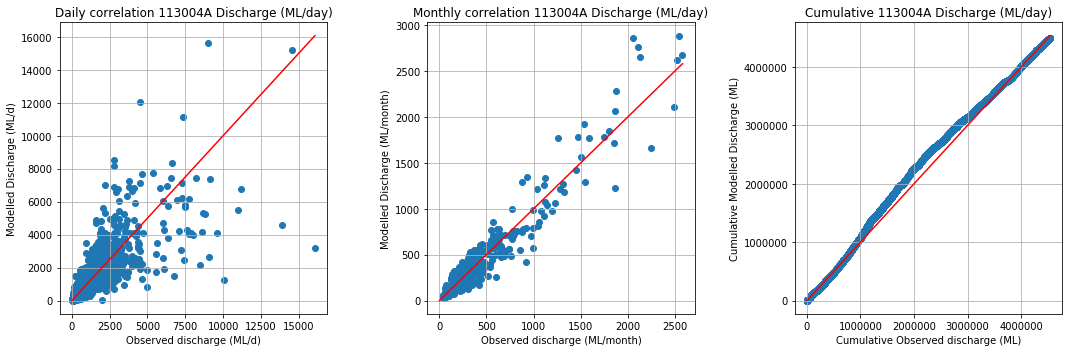

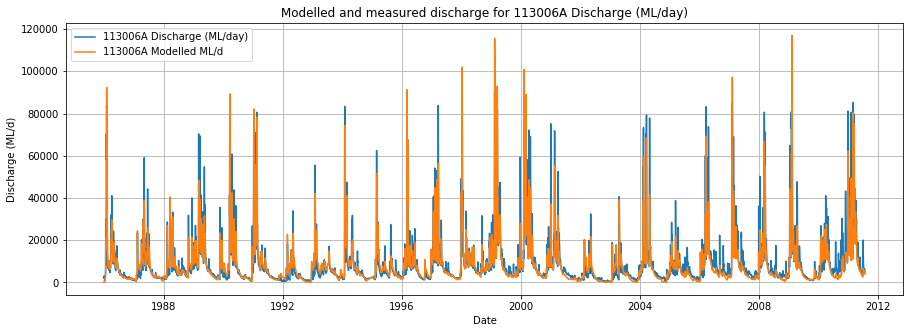

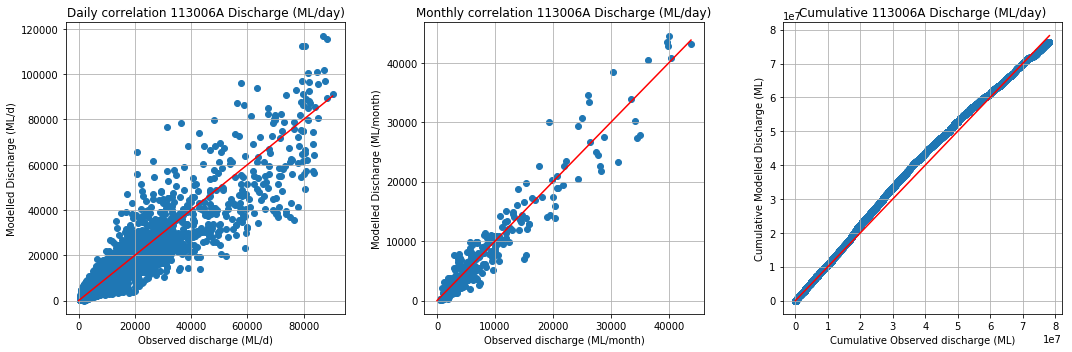

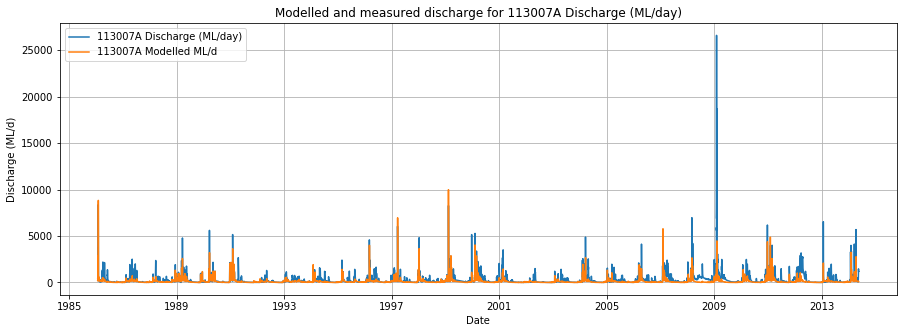

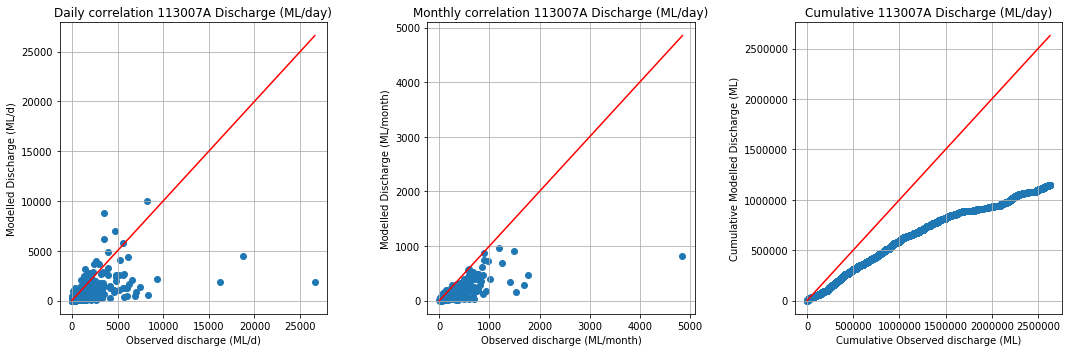

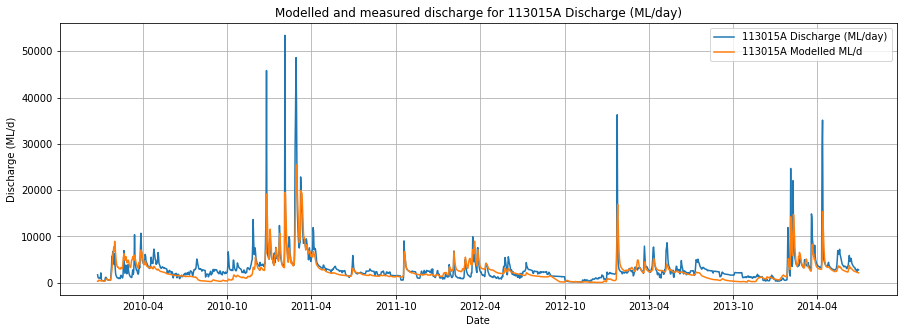

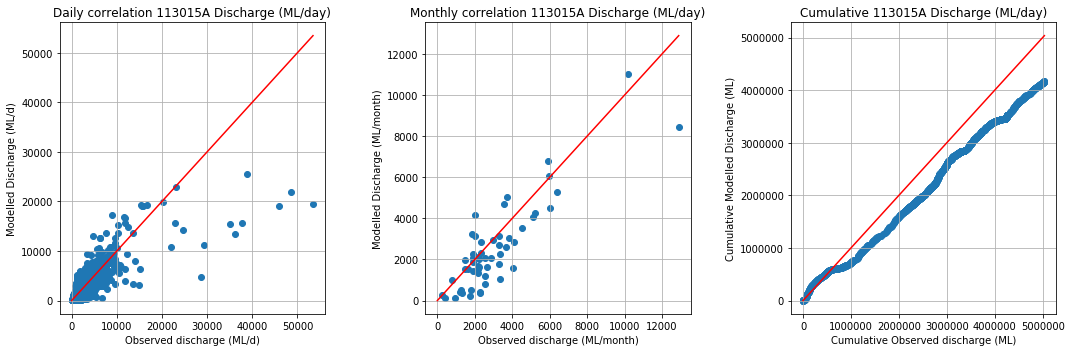

In [31]:
# Calculate and plot the modelled and measured daily statistics for APSIM integrated Source

#CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',Mod_gauges,'112101B Modelled ML/d')
CorrelationStats(Obs_gauges,'112101B Discharge (ML/day)',mod_aps_gauges,'112101B Modelled ML/d')

#CorrelationStats(Obs_gauges,'112004A Discharge (ML/day)',Mod_gauges,'112004A Modelled ML/d')
CorrelationStats(Obs_gauges,'112004A Discharge (ML/day)',mod_aps_gauges,'112004A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113004A Discharge (ML/day)',Mod_gauges,'113004A Modelled ML/d')
CorrelationStats(Obs_gauges,'113004A Discharge (ML/day)',mod_aps_gauges,'113004A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113006A Discharge (ML/day)',Mod_gauges,'113006A Modelled ML/d')
CorrelationStats(Obs_gauges,'113006A Discharge (ML/day)',mod_aps_gauges,'113006A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113007A Discharge (ML/day)',Mod_gauges,'113007A Modelled ML/d')
CorrelationStats(Obs_gauges,'113007A Discharge (ML/day)',mod_aps_gauges,'113007A Modelled ML/d')

#CorrelationStats(Obs_gauges,'113015A Discharge (ML/day)',Mod_gauges,'113015A Modelled ML/d')
CorrelationStats(Obs_gauges,'113015A Discharge (ML/day)',mod_aps_gauges,'113015A Modelled ML/d')

<h1><center></center></h1>
<h1><center>Part 5: Estimatting water quality parameters</center></h1>

In this module, the paddock model generated sugarcane runoff is combined with 100% delivery ratio of DIN to calculate the modelled DIN loads. These loads are compared on a site by site basis with the observed loads. The notebook then produces output that estimates the site based delivery ratio to apply. Example output includes:

- gauge =  113006A

- mean annual estimated observed DIN concentration =  0.218 mg/L

- mean annual modelled DIN concentration =  0.271 mg/L

- total modelled load =  6721.0 t

- Percentage APSIM DIN to apply =  0.805 %

<img src="Pictures/DINoutput.png" width="600">

The intention is to facilitate estimating the DIN delivery ratio, allowing the Source model to be rerun with the new delivery ratio in place in the subsequent modules. 

In [214]:
#collate the APSIM N_DIN time series

#Combine the APSIM N_DIN into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data N_DIN file names  y searching the directory
path =r'C:\CRPL\0064_QLD_Water_Modelling_Network\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*N_DIN.csv")

#save out the N_DIN file name list
N_DinFiles = [os.path.basename(x) for x in glob.glob(path + "/*N_DIN.csv")]

#manipulate the file names a bit
N_DinFiles = [w.replace('$sugarcane$', ' ') for w in N_DinFiles]

np.savetxt("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/N_DINNames.csv", N_DINFiles, delimiter=",", fmt='%s')


ndindfs = []
for filename in filenames:
    ndindfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
ndin = pd.concat(ndindfs, axis=1)

#remove all the date columns
NDinData=ndin.drop(ndin.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
NDinData.columns = [N_DinFiles]

#Append one column of dates back on to the data file to make the time series file
N_DinTimeseries = pd.concat([APSIMDates, NDinData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
N_DinTimeseries.index = N_DinTimeseries.Date

#export the drainage time series file with the dates column to CSV
N_DinTimeseries.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/N_DinTimeseries_kg-ha-d.csv", index=False)

# Remove the Date column from the data columns
del N_DinTimeseries['Date']

In [216]:
#collate the APSIM NLeached time series

#Combine the APSIM N_DIN into a single dataframe. This is to make it easier later - 
# I think it is easier to manipulate 1 big data frame than create loops on many individual dataframes
# get data N_DIN file names  y searching the directory
path =r'C:\CRPL\0064_QLD_Water_Modelling_Network\Tully\Raw_Accummulated_APSIM'
filenames = glob.glob(path + "/*NLeached.csv")

#save out the N_DIN file name list
NLeachedFiles = [os.path.basename(x) for x in glob.glob(path + "/*NLeached.csv")]

#manipulate the file names a bit
NLeachedFiles = [w.replace('$sugarcane$', ' ') for w in NLeachedFiles]

np.savetxt("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/NLeachedNames.csv", NLeachedFiles, delimiter=",", fmt='%s')


nldfs = []
for filename in filenames:
    nldfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame on the date axis
nl = pd.concat(nldfs, axis=1)

#remove all the date columns
NLData=nl.drop(nl.columns[[2, 4, 6]], axis=1)

#Rename the columns according to the file names so we dont get confused on which file is which
NLData.columns = [NLeachedFiles]

#Append one column of dates back on to the data file to make the time series file
NLTimeseries = pd.concat([APSIMDates, NLData], axis=1)

#Now make the dates column as the index so we can do time series plots and analysis on it
NLTimeseries.index = NLTimeseries.Date

#export the drainage time series file with the dates column to CSV
NLTimeseries.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/NLTimeseries_kg-ha-d.csv", index=False)

# Remove the Date column from the data columns
del NLTimeseries['Date']

Take the collated APSIM DIN files and load in to the model and run with 100% delivery ratio (retain the flow delivery ratios and storage parameters)

In [275]:
# bring in the modelled DIN load time series
# the dates in this series have already been made to mm/dd/yyyy for ease of import
# the column series names have also been reduced for ease of processing
modelled_din=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/tully/Modelled_DIN_t_APSIM.csv",parse_dates=['Date'])
#Now make the dates column as the index so we can do time series plots and analysis on it
modelled_din.index = modelled_din.Date
# Remove the Date column from the data columns
del modelled_din['Date']

#print(annual_din)
#modelled_din.index
#print(modelled_din)
annual_din = modelled_din.resample('A-Jun').sum()/1000
#print(annual_din)
annual_mod_aps_gauges = mod_aps_gauges.resample('A-Jun').sum()

#export the drainage time series file with the dates column to CSV
annual_din.to_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/Tully/annual_din_t-yr.csv")
# Check that the data accumulation has done something
#plt.plot(annual_din)
#plt.plot(annual_mod_aps_gauges)

Starting with DIN......

gauge =  112004A
mean annual estimated observed DIN concentration =  0.137 mg/L
mean annual modelled DIN concentration =  0.155 mg/L
total modelled load =  1975.0 t
Percentage APSIM DIN to apply =  0.887 %

gauge =  113015A
mean annual estimated observed DIN concentration =  0.142 mg/L
mean annual modelled DIN concentration =  0.11 mg/L
total modelled load =  399.0 t
Percentage APSIM DIN to apply =  1.291 %

gauge =  112101B
mean annual estimated observed DIN concentration =  0.179 mg/L
mean annual modelled DIN concentration =  0.155 mg/L
total modelled load =  1053.0 t
Percentage APSIM DIN to apply =  1.156 %

gauge =  113006A
mean annual estimated observed DIN concentration =  0.218 mg/L
mean annual modelled DIN concentration =  0.271 mg/L
total modelled load =  6721.0 t
Percentage APSIM DIN to apply =  0.805 %



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars


gauge =  1120054
mean annual estimated observed DIN concentration =  nan mg/L
mean annual modelled DIN concentration =  nan mg/L
total modelled load =  0.0 t
Percentage APSIM DIN to apply =  nan %

gauge =  1120049
mean annual estimated observed DIN concentration =  0.236 mg/L
mean annual modelled DIN concentration =  0.17 mg/L
total modelled load =  344.0 t
Percentage APSIM DIN to apply =  1.387 %



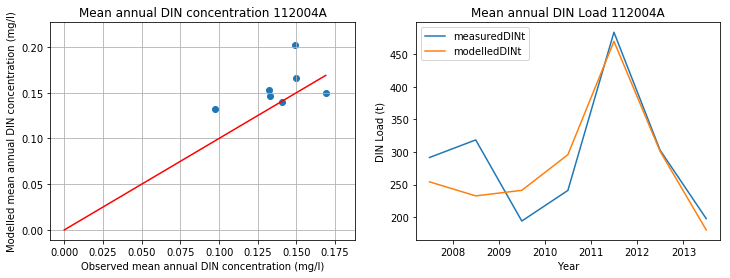

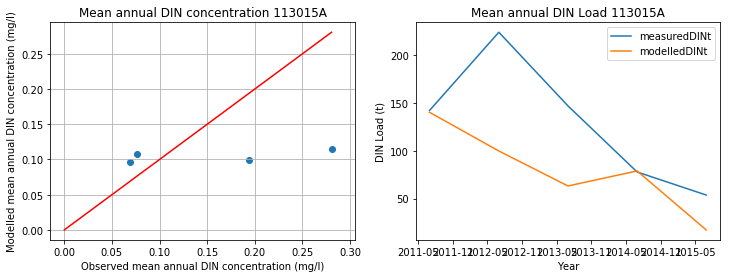

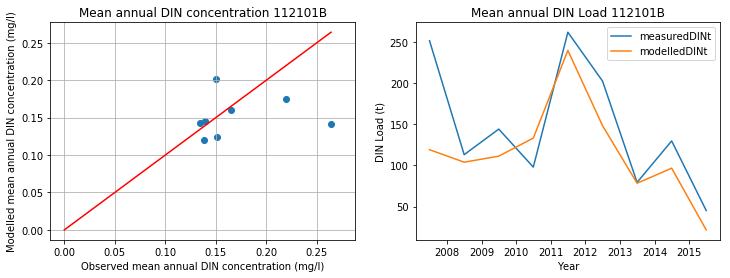

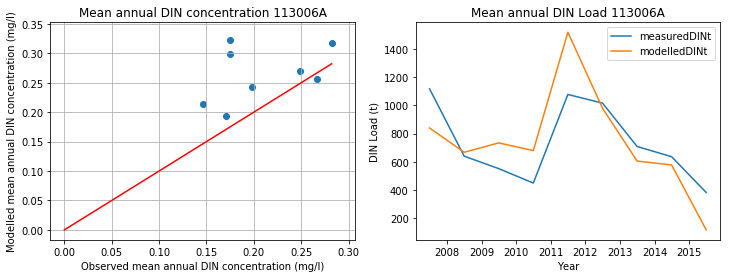

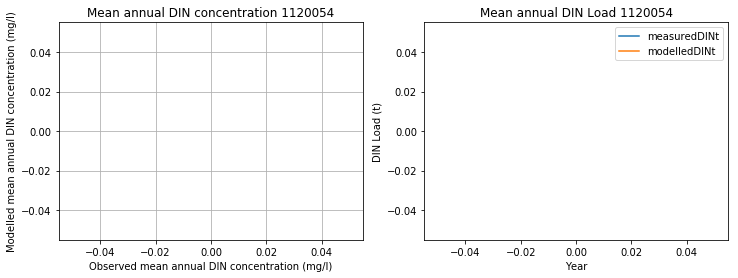

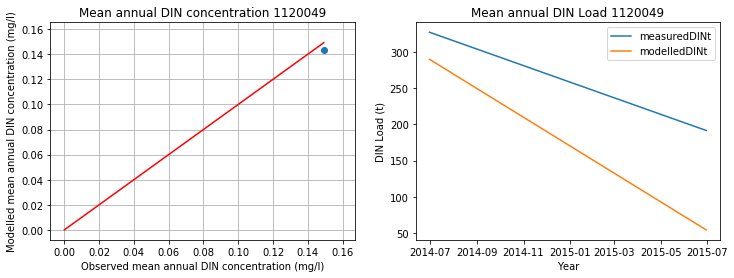

In [274]:
# Import the WQ Annual loads database first to compare mean annual loads. 
WQ_Annual_Loads=pd.read_csv("C:/CRPL/0064_QLD_Water_Modelling_Network/tully/WQ_Data/Annual_Loads.csv",parse_dates=['Year_end'])

#Now make the dates column as the index so we can do time series plots and analysis on it
WQ_Annual_Loads.index = WQ_Annual_Loads.Year_end

# snip out the Tully and Johnston bits
wqal = WQ_Annual_Loads.loc[(WQ_Annual_Loads['Basin'] == "Tully") | (WQ_Annual_Loads['Basin'] == "Johnstone")] 
#print(wqal)

#wqal = wqal.convert_objects(convert_numeric=True)

# step through and plot bar chart for each site for DIN loads. 
# snip out the individual sites, convert to a list, then to a set to remove duplicates, then back to a list 
# list the sites
site_list = wqal["Gauging station"].tolist()
site_set = set(site_list)
site_list = list(site_set)

loads = []

#print(site_list)   
#Step through the list and create dataframe for each site
for r in (site_list):
    
    wq = wqal.loc[(wqal['Gauging station'] == r)]
    #wqdin = wq[["Year","Basin","Gauging station","Method"," Discharge (ML) "," Dissolved inorganic nitrogen (t) "]]
    #Calculate the mean annaul concentration for DIN
    wqdina = wq[" Dissolved inorganic nitrogen (t) "]
    wqdina = wqdina.resample('A-Jun').sum()
    gaugedML = wq[" Discharge (ML) "]
    gaugedML = gaugedML.resample('A-Jun').sum()
    #Join them
    gaugedDIN = pd.concat([wqdina, gaugedML],axis=1, join='inner')
    # Rename some dataframe columns to help with the next step
    gaugedDIN.columns = ['tg', 'MLg'] 
    # calculate the mean annual concentrations
    gaugedconc = gaugedDIN['tg']/gaugedDIN['MLg']*1000
    
    #Just get the site specific data out of the modelled time series
    wqm = annual_din.filter(regex=r)
    hym = annual_mod_aps_gauges.filter(regex=r)
    #Join them
    modelledDIN = pd.concat([wqm, hym],axis=1, join='inner')
    # Rename some dataframe columns to help with the next step
    modelledDIN.columns = ['t', 'ML'] 
    # calculate the mean annual concentrations
    modelledconc = modelledDIN['t']/modelledDIN['ML']*1000
    
    
    # Join the observed and modelled dataframes
    wqload = pd.concat([wqdina, wqm],axis=1, join='inner')
    wqload.columns = ['measuredDINt','modelledDINt']
    
    flows = pd.concat([gaugedML,hym],axis=1,join='inner')
    flows.columns = ['measuredML','modelledML']
    
    wqconc = pd.concat([gaugedconc,modelledconc],axis=1,join='inner')
    wqconc.columns = ['measured','modelled']
    #print(wqconc)
    
    
    loads.append(wqload)
    
    #Use the obs and modelled values from the combined dataframes to ensure the same periods are used
    #print(wqload)
    #Sum the measured and modelled data
    obsload=wqload['measuredDINt'].sum()
    modload=wqload['modelledDINt'].sum()
    obsflow=flows['measuredML'].sum()
    modflow=flows['modelledML'].sum()
    
    obs_annual_conc=obsload/obsflow*1000
    mod_annual_conc=modload/modflow*1000
    
    #print(modload,obsload)
    print("gauge = ",r)
    print("mean annual estimated observed DIN concentration = ", round(obs_annual_conc,3),"mg/L")
    print("mean annual modelled DIN concentration = ", round(mod_annual_conc,3),"mg/L")
    print("total modelled load = ", round(modload,0),"t")
        
    # now output suggested parameters for the plugin
    print("Percentage APSIM DIN to apply = ", round(1-((mod_annual_conc-obs_annual_conc)/mod_annual_conc),3),"%")
    print()    
    
    
    #wqconc.plot.bar()
    obsload = wqload['measuredDINt']
    modload = wqload['modelledDINt']
    
    
    #produce a scatter plot of measured and modelled concentrations and a chart of the loads
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(wqconc['measured'],wqconc['modelled'])
    plt.grid(which = 'both')
    plt.plot([0,wqconc['measured'].max()],[0,wqconc['measured'].max()],'r')
    plt.xlabel('Observed mean annual DIN concentration (mg/l)')
    plt.ylabel('Modelled mean annual DIN concentration (mg/l)')
    plt.title('Mean annual DIN concentration ' + r)
    
    plt.subplot(1,2,2)
    plt.plot(obsload)
    plt.plot(modload)
    plt.xlabel('Year')
    plt.ylabel('DIN Load (t)')
    plt.title('Mean annual DIN Load ' + r)
    plt.legend()
    
    #wqload.plot.bar()
    
    



In [ ]:
# Rerun the model with the new delivery ratio and rerun the above module

In [ ]:
# Collate the Diuron and Atrazine load time series

In [ ]:
# rerun the model for Atrazine and Diuron

In [ ]:
# Additional assessment plots 